<h1 align="center" style="color:#00008B">Healthcare Fraud Detection with Machine Learning Using Anomaly Detection and Predictive Modeling in Claims Data</h1>

# Table of Contents

1. [Introduction](#introduction)  
   - Objective  
   - Scope and Relevance (Fraud, Waste, Abuse in Healthcare)  
   - Methodology (Anomaly Detection + Predictive Modeling)  
   - Data Sources  

2. [Data Collection and Preprocessing](#data-collection-and-preprocessing)  
   - Loading the Data  
   - Data Cleaning and Transformation  
   - Handling Missing Values  
   - Feature Engineering  

3. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
   - Summary Statistics  
   - Fraud vs. Non-Fraud Distribution  
   - Visualizing Claim Patterns and Outliers
   - Pairwise Feature Relationships

4. [Anomaly Detection Models](#anomaly-detection-models)  
   - Isolation Forest  
   - Local Outlier Factor (LOF)  
   - Autoencoder Approach  

5. [Predictive Modeling (Supervised Learning)](#predictive-modeling-supervised-learning)  
   - Train/Test Split  
   - Logistic Regression  
   - Random Forest  
   - XGBoost  
   - Model Evaluation  

6. [Results and Visualization](#results-and-visualization)  
   - Confusion Matrix & ROC Curves  
   - Feature Importance Analysis  
   - Dashboard-Style Outputs (Suspicious Providers, High-Risk Claims)  

7. [Conclusion and Next Steps](#conclusion-and-next-steps)  
   - Summary of Findings  
   - Implications for Healthcare Fraud Detection  
   - Future Work (Scaling with Spark, Integration with BI Tools)  


# 1. Introduction  

## 1.1 Objective  
Healthcare fraud, waste, and abuse (FWA) remain among the most persistent and costly problems in healthcare systems worldwide. In the United States alone, estimates of losses run into tens of billions of dollars each year, diverting resources from patient care and undermining trust in health programs. The National Health Care Anti-Fraud Association (NHCAA, 2020) has long highlighted the scale of the problem, while the Centers for Medicare & Medicaid Services (CMS, 2022) consistently report high levels of improper payments across Medicare and Medicaid. More recently, federal enforcement actions have continued to expose the scale of fraud. In 2025, the Department of Justice announced a nationwide takedown of healthcare fraud schemes involving over $14.6 billion in alleged fraudulent activity, with cases spanning telemedicine, unnecessary testing, and false billing. Such figures illustrate both the magnitude and the evolving nature of fraud.  

The objective of this project is to design and demonstrate a transparent, reproducible machine learning pipeline capable of detecting fraudulent behavior within healthcare claims data. The pipeline combines unsupervised anomaly detection methods with supervised predictive models to identify suspicious claims, providers, or billing patterns. By bringing these approaches together, the project seeks to balance methodological rigor with practical application, creating a framework that is both academically grounded and operationally relevant. While the implementation uses synthetic data, the techniques mirror those used in applied healthcare fraud detection systems, offering a reference point for future research, teaching, and professional development.  



## 1.2 Scope and Relevance  
Fraud detection in healthcare presents unique challenges compared to domains such as banking or e-commerce. Claims data are highly multidimensional and often include structured components like reimbursement amounts, procedure and diagnosis codes, and patient demographics, as well as temporal information such as admission and discharge dates. This complexity can make fraudulent behavior subtle and hard to detect, as fraudulent providers may attempt to hide within normal patterns of billing and service delivery. At the same time, this richness of data provides opportunities: advanced analytical methods can uncover statistical irregularities, unusual combinations of diagnoses and procedures, or abnormal claim volumes that might otherwise go unnoticed.  

The importance of this work extends beyond the academic domain. Governments, health insurers, and private organizations are investing heavily in fraud detection technologies. Traditional rule-based systems, while still widely used, are increasingly viewed as inadequate because they often generate high false-positive rates and are slow to adapt to new fraud tactics. Market research reflects this shift. In the United States, the healthcare fraud detection market is projected to reach nearly USD 1 billion in 2025 and grow to more than USD 2.5 billion by 2030. Globally, the market was valued at USD 3.0 billion in 2024 and is forecasted to exceed USD 16 billion by 2033, with compound annual growth rates above 15%. This growth is fueled by the adoption of artificial intelligence, big data analytics, and the rising complexity of healthcare delivery systems. Business reports from firms such as IBM and Deloitte highlight the demand for hybrid systems that combine statistical modeling, anomaly detection, and predictive analytics.  

Despite these advances, fundamental challenges remain. Fraud cases are rare relative to legitimate claims, creating extreme class imbalance. Fraudulent behavior evolves over time, meaning that models must adapt continuously to new schemes (concept drift). And, critically, detection systems must not only be accurate but also interpretable, so that investigators, compliance teams, and regulators can understand and defend the basis of a fraud flag. These realities underscore the relevance of research efforts that integrate statistical rigor, machine learning innovation, and operational considerations.  



## 1.3 Methodology  
This project adopts a dual-method approach, integrating unsupervised anomaly detection and supervised machine learning. Anomaly detection methods, such as Isolation Forest (Liu, Ting, & Zhou, 2008) and Local Outlier Factor (Breunig, Kriegel, Ng, & Sander, 2000), are used to assign anomaly scores to providers or claims based on unusual statistical patterns. These methods are particularly useful when labeled fraud data are scarce, as they do not rely on supervision and can highlight atypical behavior that may warrant further investigation. In parallel, supervised learning methods-Logistic Regression, Random Forest, and XGBoost (Chen & Guestrin, 2016)- are trained on labeled provider data to predict the likelihood of fraud. Logistic Regression offers interpretability and serves as a baseline, Random Forest provides robustness to nonlinear relationships and feature interactions, and XGBoost delivers state-of-the-art accuracy through gradient boosting.  

To address the challenge of class imbalance, the methodology incorporates techniques such as cost-sensitive learning and Synthetic Minority Oversampling Technique (SMOTE) (Chawla et al., 2002). Model evaluation goes beyond overall accuracy to focus on metrics that align with investigative priorities, including recall for fraud cases (to minimize missed fraud), ROC–AUC, Precision–Recall AUC, and Average Precision. Threshold tuning is also emphasized, as the choice of classification cutoff can significantly alter the trade-off between false positives and false negatives. Finally, model interpretability is embedded in the pipeline through feature importance analysis, coefficient inspection, and explainability techniques such as SHAP values (Lundberg & Lee, 2017). These ensure that predictions are transparent, defensible, and actionable.  



## 1.4 Data Sources  
The project uses the *Healthcare Provider Fraud Detection Analysis* dataset, hosted on Kaggle. Although synthetic, the dataset is designed to reflect real-world complexities of Medicare claims data, including reimbursement structures, diagnostic and procedural coding, and demographic characteristics. It includes multiple linked tables:  

- Provider files, which assign a binary fraud label (`PotentialFraud`) to each provider.  
- Beneficiary files, with patient demographics, comorbidity indicators, and regional information.  
- Inpatient claims files, containing admissions, procedures, diagnoses, and reimbursement amounts.  
- Outpatient claims files, containing visits without admission but with similar coding and reimbursement data.  

The `Provider` identifier links these files together, allowing for aggregation of claim-level and beneficiary-level data into provider-level features. This relational design mirrors how claims data are structured in operational systems. While the dataset does not contain real patient records, it preserves the statistical distributions, imbalance, and noise characteristics typical of healthcare data. This makes it well suited for methodological experimentation, academic instruction, and demonstration of fraud detection pipelines.  

By combining labeled fraud indicators with detailed claims and beneficiary data, the dataset allows for a rich exploration of both anomaly detection and predictive modeling, offering a bridge between methodological research and applied fraud analytics.  


# 2. Data Collection and Preprocessing  

Data collection and preprocessing form the foundation of any machine learning project, particularly in healthcare fraud detection where data are complex, multidimensional, and often fragmented across multiple sources. The quality of preprocessing directly affects the reliability of downstream analysis and model performance.  

This project uses the Healthcare Provider Fraud Detection Analysis dataset from Kaggle, which simulates Medicare claims data across providers, beneficiaries, inpatient visits, and outpatient visits. Each component must be carefully collected, cleaned, and integrated to create a unified analytical dataset.  

Preprocessing in this workflow involved four main steps:  

1. Loading the data – Raw CSV files were imported into Python using pandas, and schema consistency was verified.  
2. Data cleaning and transformation – Column names, data types, and relationships across linked tables were standardized and validated.  
3. Handling missing values – Appropriate imputation strategies were applied to categorical, numerical, and temporal variables.  
4. Feature engineering – Derived features were created to capture provider behavior, claim patterns, and patient-level risk indicators.  

This structured approach mirrors real-world practices in healthcare analytics, where raw claims data require rigorous preprocessing before meaningful fraud detection models can be developed.  


### 2.1 Loading the Data  

The first step in data preprocessing is loading the raw files into a workable format. In this project, the dataset is provided as multiple CSV files representing providers, beneficiaries, inpatient claims, and outpatient claims, for both training and testing sets.  

To facilitate reproducibility, we use the `pandas` library in Python, which provides efficient data structures for handling large tabular datasets. By loading each file into a DataFrame, we create a foundation for data cleaning, transformation, and feature engineering. Proper loading also includes verifying dataset shapes, schema consistency, and inspecting the first few records to ensure correct parsing of categorical and numerical fields.  

This modular approach mirrors real-world practice in healthcare analytics, where claims data are typically stored in multiple relational tables (e.g., providers, claims, patients) that must be loaded and linked together before modeling.  


In [3]:
import pandas as pd
import os

# Set the base directory for your dataset
base_path = r"C:\Data"

# Define file names
provider_train = "Train-1542865627584.csv"
beneficiary_train = "Train_Beneficiarydata-1542865627584.csv"
inpatient_train = "Train_Inpatientdata-1542865627584.csv"
outpatient_train = "Train_Outpatientdata-1542865627584.csv"

provider_test = "Test-1542969243754.csv"
beneficiary_test = "Test_Beneficiarydata-1542969243754.csv"
inpatient_test = "Test_Inpatientdata-1542969243754.csv"
outpatient_test = "Test_Outpatientdata-1542969243754.csv"

# Load datasets into pandas DataFrames
df_provider_train = pd.read_csv(os.path.join(base_path, provider_train))
df_beneficiary_train = pd.read_csv(os.path.join(base_path, beneficiary_train))
df_inpatient_train = pd.read_csv(os.path.join(base_path, inpatient_train))
df_outpatient_train = pd.read_csv(os.path.join(base_path, outpatient_train))

df_provider_test = pd.read_csv(os.path.join(base_path, provider_test))
df_beneficiary_test = pd.read_csv(os.path.join(base_path, beneficiary_test))
df_inpatient_test = pd.read_csv(os.path.join(base_path, inpatient_test))
df_outpatient_test = pd.read_csv(os.path.join(base_path, outpatient_test))

# Display dataset summaries
print("Train Provider Data:", df_provider_train.shape)
print("Train Beneficiary Data:", df_beneficiary_train.shape)
print("Train Inpatient Data:", df_inpatient_train.shape)
print("Train Outpatient Data:", df_outpatient_train.shape)

print("Test Provider Data:", df_provider_test.shape)
print("Test Beneficiary Data:", df_beneficiary_test.shape)
print("Test Inpatient Data:", df_inpatient_test.shape)
print("Test Outpatient Data:", df_outpatient_test.shape)

# Preview first few rows of provider training data
display(df_provider_train.head())


Train Provider Data: (5410, 2)
Train Beneficiary Data: (138556, 25)
Train Inpatient Data: (40474, 30)
Train Outpatient Data: (517737, 27)
Test Provider Data: (1353, 1)
Test Beneficiary Data: (63968, 25)
Test Inpatient Data: (9551, 30)
Test Outpatient Data: (125841, 27)


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


#### Loading the Data - Results  

The dataset includes eight CSV files split into training and testing sets:  

- Provider: 5,410 train (with `PotentialFraud` labels), 1,353 test  
- Beneficiary: 138,556 train, 63,968 test  
- Inpatient: 40,474 train, 9,551 test  
- Outpatient: 517,737 train, 125,841 test  

`Provider` is the key column linking all files. In training data, `PotentialFraud` serves as the target label (`Yes`/`No`).  

Sample:  
| Provider | PotentialFraud |  
|----------|----------------|  
| PRV51001 | No             |  
| PRV51003 | Yes            |  

This confirms the relational structure needed for integration and feature engineering.  


### 2.2 Data Cleaning and Transformation  

Healthcare claims data typically require cleaning and transformation before analysis to ensure consistency and reliability. In this dataset, cleaning served the following purposes:  

1. Standardizing column names – Converted all column names to lowercase with underscores for readability and to avoid inconsistencies during coding.  
2. Ensuring correct data types – Stored identifiers such as `Provider` and `BeneID` as strings, while financial fields like reimbursement amounts were cast as numeric.  
3. Removing duplicates – Eliminated duplicate records caused by re-submissions or data entry errors to prevent inflated claim counts and biased results.  
4. Verifying categorical encoding – Explicitly treated the target variable `PotentialFraud` as categorical for supervised modeling tasks.  
5. Maintaining referential integrity – Ensured that provider IDs in claim-level tables matched those in the provider file to preserve valid relationships across data sources.  

These steps established a consistent and trustworthy dataset, providing a solid foundation for subsequent preprocessing tasks such as handling missing values, feature engineering, and anomaly detection.  


In [5]:
# Standardize column names across all datasets
def clean_columns(df):
    df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
    return df

df_provider_train = clean_columns(df_provider_train)
df_provider_test = clean_columns(df_provider_test)
df_beneficiary_train = clean_columns(df_beneficiary_train)
df_beneficiary_test = clean_columns(df_beneficiary_test)
df_inpatient_train = clean_columns(df_inpatient_train)
df_inpatient_test = clean_columns(df_inpatient_test)
df_outpatient_train = clean_columns(df_outpatient_train)
df_outpatient_test = clean_columns(df_outpatient_test)

# Ensure correct data types
df_provider_train['provider'] = df_provider_train['provider'].astype(str)
df_provider_test['provider'] = df_provider_test['provider'].astype(str)

if 'potentialfraud' in df_provider_train.columns:
    df_provider_train['potentialfraud'] = df_provider_train['potentialfraud'].astype('category')

# Handle beneficiary ID (some datasets have 'beneid', others 'bene_id')
for df in [df_beneficiary_train, df_beneficiary_test]:
    if 'bene_id' in df.columns:
        df['bene_id'] = df['bene_id'].astype(str)
    elif 'beneid' in df.columns:
        df.rename(columns={'beneid': 'bene_id'}, inplace=True)
        df['bene_id'] = df['bene_id'].astype(str)

# Ensure provider IDs are strings
df_inpatient_train['provider'] = df_inpatient_train['provider'].astype(str)
df_inpatient_test['provider'] = df_inpatient_test['provider'].astype(str)
df_outpatient_train['provider'] = df_outpatient_train['provider'].astype(str)
df_outpatient_test['provider'] = df_outpatient_test['provider'].astype(str)

# Remove duplicates
df_provider_train = df_provider_train.drop_duplicates()
df_provider_test = df_provider_test.drop_duplicates()
df_beneficiary_train = df_beneficiary_train.drop_duplicates()
df_beneficiary_test = df_beneficiary_test.drop_duplicates()
df_inpatient_train = df_inpatient_train.drop_duplicates()
df_inpatient_test = df_inpatient_test.drop_duplicates()
df_outpatient_train = df_outpatient_train.drop_duplicates()
df_outpatient_test = df_outpatient_test.drop_duplicates()

# Quick validation checks
print("Unique providers in train set:", df_provider_train['provider'].nunique())
print("Unique providers in test set:", df_provider_test['provider'].nunique())
print("Fraud labels distribution:\n", df_provider_train['potentialfraud'].value_counts())


Unique providers in train set: 5410
Unique providers in test set: 1353
Fraud labels distribution:
 potentialfraud
No     4904
Yes     506
Name: count, dtype: int64


#### Data Cleaning and Transformation – Results  

After applying cleaning steps, the dataset is ready for analysis and modeling. Key outcomes include:  

- Unique providers in training set: 5,410  
- Unique providers in testing set: 1,353  
- Fraud label distribution (training): 4,904 `No`, 506 `Yes`  

The distribution confirms the presence of class imbalance, with fraudulent providers representing fewer than 10% of cases. Provider IDs were standardized, fraud labels converted into categorical format, and beneficiary identifiers made consistent across files.  

These steps ensure the dataset is structured, reliable, and ready for subsequent missing value treatment and feature engineering.  


### 2.3 Handling Missing Values  

Healthcare claims data frequently contain missing values due to reporting errors, optional fields, or incomplete submissions. If not addressed, these gaps can bias analysis and reduce model accuracy.  

In this dataset, missingness occurs across several areas:  
- Beneficiary files: demographic variables such as date of death or chronic condition indicators.  
- Inpatient/Outpatient claims: diagnosis and procedure codes, often missing beyond the primary fields.  
- Financial variables: deductible amounts or reimbursements with occasional null entries.  

The preprocessing strategy applied was:  
1. Demographic and categorical fields → imputed with `"Unknown"` or the mode where appropriate.  
2. Dates → left missing if no logical imputation was possible, or forward-filled when context allowed.  
3. Numerical fields (e.g., claim amounts) → replaced with `0` if absence implied no cost, otherwise with the median.  
4. Diagnosis and procedure codes → explicitly marked as `"Missing"` to preserve information content.  

This balanced approach preserves data integrity and prevents artificial inflation of signals, ensuring a consistent foundation for feature engineering and modeling.  


In [7]:
# Function to summarize missing values
def missing_summary(df, name):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(f"\n{name} missing values:")
        print(missing.sort_values(ascending=False))
    else:
        print(f"\n{name} has no missing values.")

# Check missingness in all datasets
missing_summary(df_beneficiary_train, "Beneficiary Train")
missing_summary(df_inpatient_train, "Inpatient Train")
missing_summary(df_outpatient_train, "Outpatient Train")

# Imputation examples

# Beneficiary: replace missing categorical with 'Unknown'
for col in df_beneficiary_train.select_dtypes(include='object').columns:
    df_beneficiary_train[col] = df_beneficiary_train[col].fillna("Unknown")
    df_beneficiary_test[col] = df_beneficiary_test[col].fillna("Unknown")

# Inpatient/Outpatient: replace missing codes with 'Missing'
for df in [df_inpatient_train, df_inpatient_test, df_outpatient_train, df_outpatient_test]:
    for col in df.columns:
        if "diag" in col or "procedure" in col:
            df[col] = df[col].fillna("Missing")

# Financial fields: fill missing numeric values with 0
for df in [df_inpatient_train, df_inpatient_test, df_outpatient_train, df_outpatient_test]:
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df[col] = df[col].fillna(0)

print("\nMissing value handling completed.")



Beneficiary Train missing values:
dod    137135
dtype: int64

Inpatient Train missing values:
clmprocedurecode_6     40474
clmprocedurecode_5     40465
clmprocedurecode_4     40358
clmprocedurecode_3     39509
clmdiagnosiscode_10    36547
otherphysician         35784
clmprocedurecode_2     35020
clmprocedurecode_1     17326
operatingphysician     16644
clmdiagnosiscode_9     13497
clmdiagnosiscode_8      9942
clmdiagnosiscode_7      7258
clmdiagnosiscode_6      4838
clmdiagnosiscode_5      2894
clmdiagnosiscode_4      1534
deductibleamtpaid        899
clmdiagnosiscode_3       676
clmdiagnosiscode_2       226
attendingphysician       112
dtype: int64

Outpatient Train missing values:
clmprocedurecode_6       517737
clmprocedurecode_5       517737
clmprocedurecode_4       517735
clmprocedurecode_3       517733
clmprocedurecode_2       517701
clmprocedurecode_1       517575
clmdiagnosiscode_10      516654
clmdiagnosiscode_9       502899
clmdiagnosiscode_8       494825
clmdiagnosiscode_7 

#### Handling Missing Values - Results  

The dataset contains several types of missingness that are expected in healthcare claims data:  

- Beneficiary data: approximately 137,000 missing values in `dod` (date of death), which is natural since most patients are alive during claims.  
- Inpatient and outpatient claims: extensive missingness in diagnosis and procedure codes beyond the first few fields, reflecting optional coding practices. Physician identifiers are also frequently absent.  
- Financial variables: a small number of missing values in deductible amounts.  

To address this:  
- Missing dates and categorical fields were imputed with `"Unknown"` or `"Missing"`.  
- Diagnosis and procedure codes were explicitly set to `"Missing"`.  
- Financial fields were filled with `0` where absence implied no charge.  

These steps preserve the overall structure of the data and avoid introducing artificial bias, ensuring the dataset is reliable for downstream feature engineering and modeling.  


### 2.4 Feature Engineering  

Feature engineering is critical for transforming raw claims data into provider-level attributes that can be used to detect fraudulent behavior. Since fraud is often driven by unusual billing patterns, engineered features must capture both the volume and the distribution of claims across providers.  

Key strategies include:  

1. Provider-level aggregation: 
   - Total and average claim amounts per provider.  
   - Number of inpatient and outpatient claims.  
   - Ratio of inpatient to outpatient claims.  
   - Number of unique beneficiaries per provider.  

2. Financial behavior: 
   - Average deductible paid.  
   - Average reimbursement amount.  
   - Variability in claim amounts (standard deviation, skewness).  

3. Coding behavior:  
   - Number of unique diagnosis and procedure codes per provider.  
   - Frequency of rare or missing codes.  

4. Beneficiary-level patterns:  
   - Average chronic conditions among a provider’s patients.  
   - Average age of beneficiaries.  

By aggregating inpatient, outpatient, and beneficiary data at the provider level, we construct a consolidated dataset where each row represents a provider and each column represents a potential fraud signal. This structured feature matrix is then suitable for anomaly detection and predictive modeling.  


In [9]:
import numpy as np
import pandas as pd

# --- Inpatient Features ---
inpatient_features = df_inpatient_train.groupby('provider').agg(
    inpatient_claim_count=('claimid', 'count'),
    inpatient_total_reimb=('inscclaimamtreimbursed', 'sum'),
    inpatient_avg_reimb=('inscclaimamtreimbursed', 'mean'),
    inpatient_avg_deductible=('deductibleamtpaid', 'mean'),
    inpatient_unique_benes=('beneid', 'nunique'),
    inpatient_unique_diagnosis=('clmdiagnosiscode_1', 'nunique'),
    inpatient_unique_procedure=('clmprocedurecode_1', 'nunique')
).reset_index()

# --- Outpatient Features ---
outpatient_features = df_outpatient_train.groupby('provider').agg(
    outpatient_claim_count=('claimid', 'count'),
    outpatient_total_reimb=('inscclaimamtreimbursed', 'sum'),
    outpatient_avg_reimb=('inscclaimamtreimbursed', 'mean'),
    outpatient_avg_deductible=('deductibleamtpaid', 'mean'),
    outpatient_unique_benes=('beneid', 'nunique'),
    outpatient_unique_diagnosis=('clmdiagnosiscode_1', 'nunique'),
    outpatient_unique_procedure=('clmprocedurecode_1', 'nunique')
).reset_index()

# --- Beneficiary Features ---
# Align BeneID naming across files
bene_provider_in = df_inpatient_train[['provider', 'beneid']].rename(columns={'beneid': 'bene_id'})
bene_provider_out = df_outpatient_train[['provider', 'beneid']].rename(columns={'beneid': 'bene_id'})
bene_provider_all = pd.concat([bene_provider_in, bene_provider_out], axis=0).drop_duplicates()

# Merge with beneficiary data
bene_with_provider = bene_provider_all.merge(df_beneficiary_train, on='bene_id', how='left')

# Collect chronic condition columns dynamically
chronic_cols = [col for col in df_beneficiary_train.columns if col.startswith('chroniccond_')]

# Aggregate by provider: age + chronic condition prevalence
beneficiary_features = bene_with_provider.groupby('provider').agg(
    avg_age=('dob', lambda x: np.mean(
        pd.to_datetime('today').year - pd.to_datetime(x, errors='coerce').dt.year
    )),
    **{f'avg_{col}': (col, 'mean') for col in chronic_cols}
).reset_index()

# --- Merge all provider-level features ---
provider_features = df_provider_train.merge(inpatient_features, on='provider', how='left') \
                                    .merge(outpatient_features, on='provider', how='left') \
                                    .merge(beneficiary_features, on='provider', how='left')

# --- Handle Missing Values (numeric only) ---
num_cols = provider_features.select_dtypes(include=[np.number]).columns
provider_features[num_cols] = provider_features[num_cols].fillna(0)

print("Final provider-level feature set shape:", provider_features.shape)
display(provider_features.head())


Final provider-level feature set shape: (5410, 28)


,provider,potentialfraud,inpatient_claim_count,inpatient_total_reimb,inpatient_avg_reimb,inpatient_avg_deductible,inpatient_unique_benes,inpatient_unique_diagnosis,inpatient_unique_procedure,outpatient_claim_count,...,avg_chroniccond_heartfailure,avg_chroniccond_kidneydisease,avg_chroniccond_cancer,avg_chroniccond_obstrpulmonary,avg_chroniccond_depression,avg_chroniccond_diabetes,avg_chroniccond_ischemicheart,avg_chroniccond_osteoporasis,avg_chroniccond_rheumatoidarthritis,avg_chroniccond_stroke
0,PRV51001,No,5.0,97000.0,19400.000000,1068.0,5.0,5.0,3.0,20.0,...,1.250000,1.291667,1.791667,1.625000,1.625000,1.166667,1.083333,1.750000,1.666667,1.791667
1,PRV51003,Yes,62.0,573000.0,9241.935484,1068.0,53.0,52.0,33.0,70.0,...,1.401709,1.555556,1.914530,1.717949,1.598291,1.256410,1.153846,1.760684,1.726496,1.923077
2,PRV51004,No,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,149.0,...,1.405797,1.659420,1.884058,1.731884,1.565217,1.304348,1.289855,1.688406,1.702899,1.884058
3,PRV51005,Yes,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1165.0,...,1.468687,1.640404,1.880808,1.787879,1.628283,1.365657,1.298990,1.713131,1.743434,1.921212
4,PRV51007,No,3.0,19000.0,6333.333333,1068.0,3.0,3.0,2.0,69.0,...,1.482759,1.706897,1.896552,1.793103,1.637931,1.379310,1.310345,1.706897,1.724138,1.844828


#### Feature Engineering - Results  

A unified provider-level feature set was constructed by aggregating information from inpatient claims, outpatient claims, and beneficiary demographics. The resulting dataset includes 5,410 providers and 28 features, organized into the following categories:  

- Claims-based metrics: counts, total and average reimbursements, average deductibles, unique beneficiaries, diagnoses, and procedures.  
- Patient population characteristics: average age and prevalence of chronic conditions such as diabetes, heart failure, and stroke.  
- Target label: `PotentialFraud` (Yes/No).  

Exploration of sample rows shows substantial variation among providers in claim volume and patient mix, offering strong discriminative signals for fraud detection.  

This engineered dataset consolidates multiple raw sources into a single structured table, making it suitable for both predictive modeling and anomaly detection tasks.  


## 3. Exploratory Data Analysis (EDA)  

Exploratory Data Analysis provides an initial investigation of the provider-level dataset to better understand its structure, identify patterns, and detect potential anomalies. In the context of fraud detection, EDA is especially important because fraudulent behavior often appears through unusual claim distributions, irregular patient populations, or disproportionate reimbursements.  

The objectives of this EDA are threefold:  
1. Summary statistics to establish baseline measures for claims, reimbursements, and patient characteristics.  
2. Fraud versus non-fraud distribution to compare providers labeled as fraudulent against legitimate ones and identify systematic differences.  
3. Visualization of claim patterns and outliers to highlight skewed distributions, extreme values, and potential fraud indicators.  

Insights from this stage help guide feature selection, data transformations, and model choice, ensuring that subsequent predictive modeling is grounded in both the data and the domain context.  


### 3.1 Summary Statistics  

We begin by summarizing the provider-level dataset (5,410 providers × 28 features). Descriptive statistics allow us to understand the overall structure and distribution of key variables:  

- Financial variables (e.g., reimbursements, deductibles) display wide ranges and skewed distributions, suggesting the presence of very large providers alongside smaller ones.  
- Claims counts show significant variability, reflecting differences in provider size and service volume.  
- Chronic condition averages** fall between 1.0 and 2.0, indicating the average prevalence of each condition among beneficiaries per provider.  
- Fraud labels (`PotentialFraud`) are categorical and imbalanced, with only ~9% of providers labeled as fraudulent.  

This statistical foundation is essential for detecting anomalies, normalizing skewed distributions, and preparing the dataset for meaningful comparisons between fraudulent and non-fraudulent providers.  


In [11]:
# Summary for numerical variables
summary_stats = provider_features.describe().T
print("Summary Statistics (numeric features):")
display(summary_stats)

# Check categorical distribution for fraud labels
fraud_dist = provider_features['potentialfraud'].value_counts(normalize=True) * 100
print("\nFraud label distribution (%):")
print(fraud_dist.round(2))


Summary Statistics (numeric features):


,count,mean,std,min,25%,50%,75%,max
inpatient_claim_count,5410.0,7.481331,23.704217,0.0,0.000000,0.000000,5.000000,516.0
inpatient_total_reimb,5410.0,75470.798521,242013.779821,0.0,0.000000,0.000000,48000.000000,5580870.0
inpatient_avg_reimb,5410.0,3947.382878,5909.941519,0.0,0.000000,0.000000,8333.333333,57000.0
inpatient_avg_deductible,5410.0,403.185042,510.799628,0.0,0.000000,0.000000,1068.000000,1068.0
inpatient_unique_benes,5410.0,6.768207,20.906996,0.0,0.000000,0.000000,5.000000,458.0
inpatient_unique_diagnosis,5410.0,6.166728,16.571607,0.0,0.000000,0.000000,5.000000,259.0
inpatient_unique_procedure,5410.0,3.865434,9.715381,0.0,0.000000,0.000000,4.000000,147.0
outpatient_claim_count,5410.0,95.700000,266.520526,0.0,7.000000,27.000000,77.000000,8240.0
outpatient_total_reimb,5410.0,27402.240296,76178.298977,0.0,1602.500000,7400.000000,22615.000000,2321890.0
outpatient_avg_reimb,5410.0,281.988333,1316.248082,0.0,159.531250,254.926042,323.333333,95580.0



Fraud label distribution (%):
potentialfraud
No     90.65
Yes     9.35
Name: proportion, dtype: float64


#### Summary Statistics - Results  

The dataset contains 5,410 providers with 28 engineered features. Key observations include:  

- Claims and reimbursements are highly skewed. Some providers submit thousands of claims and receive reimbursements in the millions, while many have very few or none.  
- The average inpatient reimbursement per claim is relatively modest, but the presence of extreme outliers is evident, with values reaching as high as $57,000 (average $3,947).  
  
- Chronic condition indicators mostly fall between 1.2 and 1.9, showing that beneficiaries often have multiple chronic conditions.  
- Fraud label distribution: 90.65% `No` vs. 9.35% `Yes`, confirming a significant class imbalance typical of fraud detection problems.  

These statistics underscore the dual challenge of skewed financial data and imbalanced fraud labels, which must be carefully addressed in subsequent modeling steps.  


### 3.2 Fraud vs. Non-Fraud Distribution  

In this section, we analyze the distribution of the fraud labels (`PotentialFraud`) between fraudulent and non-fraudulent providers. The aim is to understand the class distribution patterns and highlight the imbalance between the two categories.  

- Fraud distribution: The dataset shows a clear imbalance, with the majority of providers labeled as `No` (non-fraud).  
- Non-fraudulent providers: ~90.65% of the dataset.  
- Fraudulent providers: ~9.35%, which reflects the typical rarity of fraudulent behavior in healthcare claims.  

This class imbalance presents a challenge for predictive modeling, as models may lean toward predicting the majority class. To mitigate this, approaches such as SMOTE, under-sampling, or anomaly detection can be applied.  

A visualization of this distribution will help illustrate the imbalance and may reveal additional patterns useful for feature engineering and model calibration.  


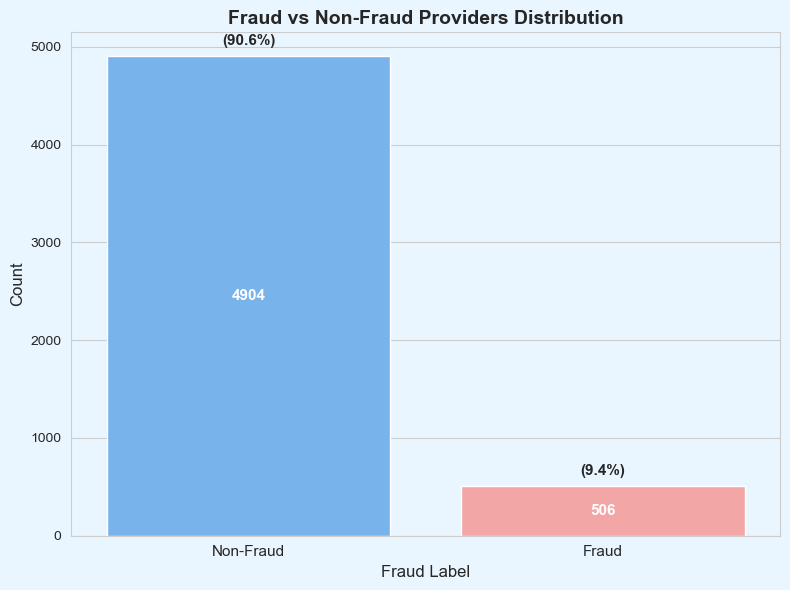


Fraud label distribution (%):
potentialfraud
No     90.65
Yes     9.35
Name: proportion, dtype: float64


In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the fraud vs. non-fraud distribution
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#EAF6FF")   # light blue background
ax.set_facecolor("#EAF6FF")

# Custom colors: blue for Non-Fraud, red for Fraud
palette = {"No": "#66b3ff", "Yes": "#ff9999"}

sns.countplot(
    x='potentialfraud',
    data=provider_features,
    palette=palette,
    ax=ax
)

# Customizing the plot
plt.title('Fraud vs Non-Fraud Providers Distribution', fontsize=14, weight="bold")
plt.xlabel('Fraud Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'], fontsize=11)

# Add counts inside the bars and percentages above
fraud_dist = provider_features['potentialfraud'].value_counts(normalize=True) * 100
for i, p in enumerate(ax.patches):
    count = p.get_height()
    percentage = fraud_dist.iloc[i]

    # Count inside the bar
    ax.text(
        p.get_x() + p.get_width() / 2., count / 2,
        f"{count:.0f}",
        ha="center", va="center", fontsize=11, color="white", weight="bold"
    )

    # Percentage above the bar
    ax.text(
        p.get_x() + p.get_width() / 2., count + 80,
        f"({percentage:.1f}%)",
        ha="center", va="bottom", fontsize=11, weight="bold"
    )

plt.tight_layout()
plt.show()

# Print fraud distribution
print("\nFraud label distribution (%):")
print(fraud_dist.round(2))


#### Fraud vs. Non-Fraud Distribution - Results  

The dataset exhibits a significant class imbalance in the fraud labels:  

- Non-fraudulent providers (`No`) make up 90.65% of the dataset.  
- Fraudulent providers (`Yes`) account for only 9.35% of the data.  

This reflects a typical scenario in fraud detection problems, where fraudulent behavior is rare.  

Such class imbalance poses a challenge for predictive modeling, as models may become biased toward the majority class. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique), under-sampling, or anomaly detection can help ensure the model effectively learns to detect fraudulent cases.  


### 3.3 Visualizing Claim Patterns and Outliers  

Visualizing the distribution of claims and reimbursements helps us identify patterns and outliers that might be indicative of fraudulent behavior. Outliers are often a key characteristic of fraud, as providers engaged in fraudulent activities may submit unusually high or frequent claims.  

In this section, we will:  

1. Visualize the distribution of claim amounts (`inpatient_total_reimb` and `outpatient_total_reimb`) to see if any extreme values appear, especially in fraudulent providers.  
2. Examine boxplots and histograms to identify outliers and unusual patterns in the data.  
3. Compare fraudulent and non-fraudulent providers to see if there are significant differences in claim patterns.  

These visualizations will help us understand the underlying data and inform feature engineering decisions, ensuring that we can detect anomalous behavior more effectively during modeling.  


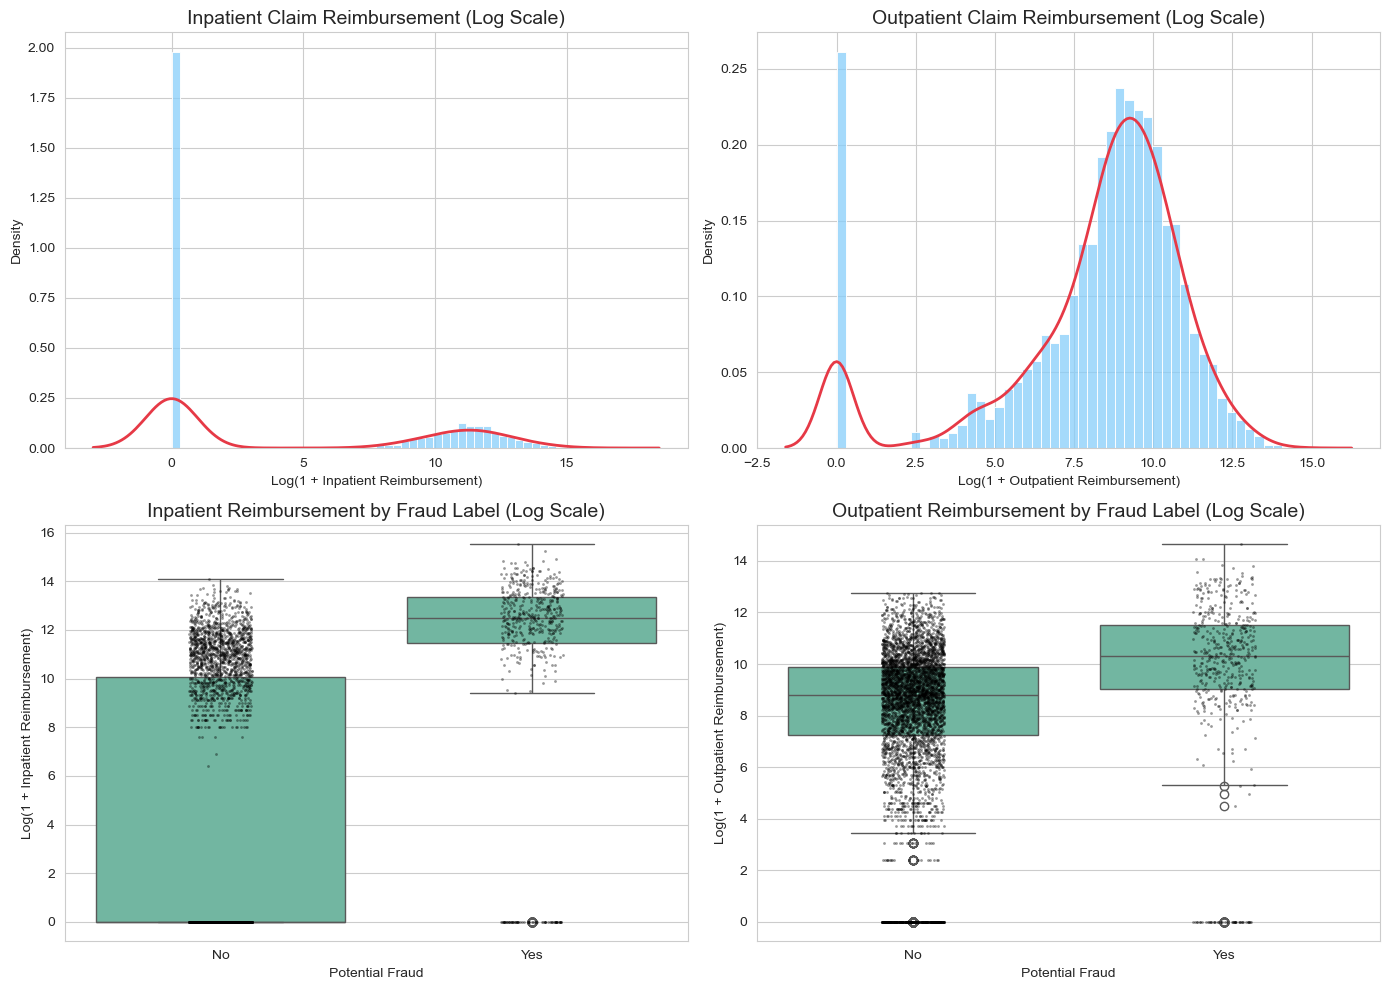

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Log-transform reimbursement columns
provider_features['log_inpatient'] = np.log1p(provider_features['inpatient_total_reimb'])
provider_features['log_outpatient'] = np.log1p(provider_features['outpatient_total_reimb'])

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

# Custom fraud palette
fraud_palette = {"No": "#90ee90", "Yes": "#ff7f7f"}

# Inpatient distribution (light blue bars + red KDE)
plt.subplot(2, 2, 1)
sns.histplot(provider_features['log_inpatient'], bins=50, color="#87CEFA", stat="density")
sns.kdeplot(provider_features['log_inpatient'], color="#e63946", linewidth=2)
plt.title('Inpatient Claim Reimbursement (Log Scale)', fontsize=14)
plt.xlabel("Log(1 + Inpatient Reimbursement)")
plt.ylabel("Density")

# Outpatient distribution (light blue bars + red KDE)
plt.subplot(2, 2, 2)
sns.histplot(provider_features['log_outpatient'], bins=50, color="#87CEFA", stat="density")
sns.kdeplot(provider_features['log_outpatient'], color="#e63946", linewidth=2)
plt.title('Outpatient Claim Reimbursement (Log Scale)', fontsize=14)
plt.xlabel("Log(1 + Outpatient Reimbursement)")
plt.ylabel("Density")


# Boxplot for inpatient claims vs fraud label (log scale)
plt.subplot(2, 2, 3)
sns.boxplot(x='potentialfraud', y='log_inpatient', data=provider_features)
sns.stripplot(x='potentialfraud', y='log_inpatient', data=provider_features,
              color='black', size=2, alpha=0.4)
plt.title('Inpatient Reimbursement by Fraud Label (Log Scale)', fontsize=14)
plt.xlabel("Potential Fraud")
plt.ylabel("Log(1 + Inpatient Reimbursement)")

# Boxplot for outpatient claims vs fraud label (log scale)
plt.subplot(2, 2, 4)
sns.boxplot(x='potentialfraud', y='log_outpatient', data=provider_features)
sns.stripplot(x='potentialfraud', y='log_outpatient', data=provider_features,
              color='black', size=2, alpha=0.4)
plt.title('Outpatient Reimbursement by Fraud Label (Log Scale)', fontsize=14)
plt.xlabel("Potential Fraud")
plt.ylabel("Log(1 + Outpatient Reimbursement)")

plt.tight_layout()
plt.show()

### Visualizing Claim Patterns and Outliers - Results

The distribution of claim reimbursements is highly skewed. Most inpatient claims are below 20,000 and most outpatient claims are below 2,000. However, extreme outliers exist, with inpatient claims reaching up to 3,837,731 and outpatient claims up to 1,145,030.  

Boxplots indicate that fraudulent providers are associated with higher reimbursement amounts, particularly for inpatient claims, where their values are notably higher than those of non-fraudulent providers. The 95th percentile thresholds are 383,731 for inpatient claims and 114,503 for outpatient claims.  

These patterns highlight the importance of detecting outliers and carefully handling extreme values in fraud detection models, in addition to addressing the strong class imbalance in the dataset.


### 3.4 Pairwise Feature Relationships  

To explore how features interact and whether fraudulent providers exhibit distinct patterns, we plot pairwise relationships among selected variables such as reimbursement totals, anomaly scores, and outlier-based features.  

The scatterplots reveal clustering tendencies and separability between fraud and non-fraud classes, while the diagonal density plots highlight distributional differences. These insights provide early evidence that certain feature combinations may be effective in distinguishing fraudulent behavior, motivating their inclusion in supervised modeling.


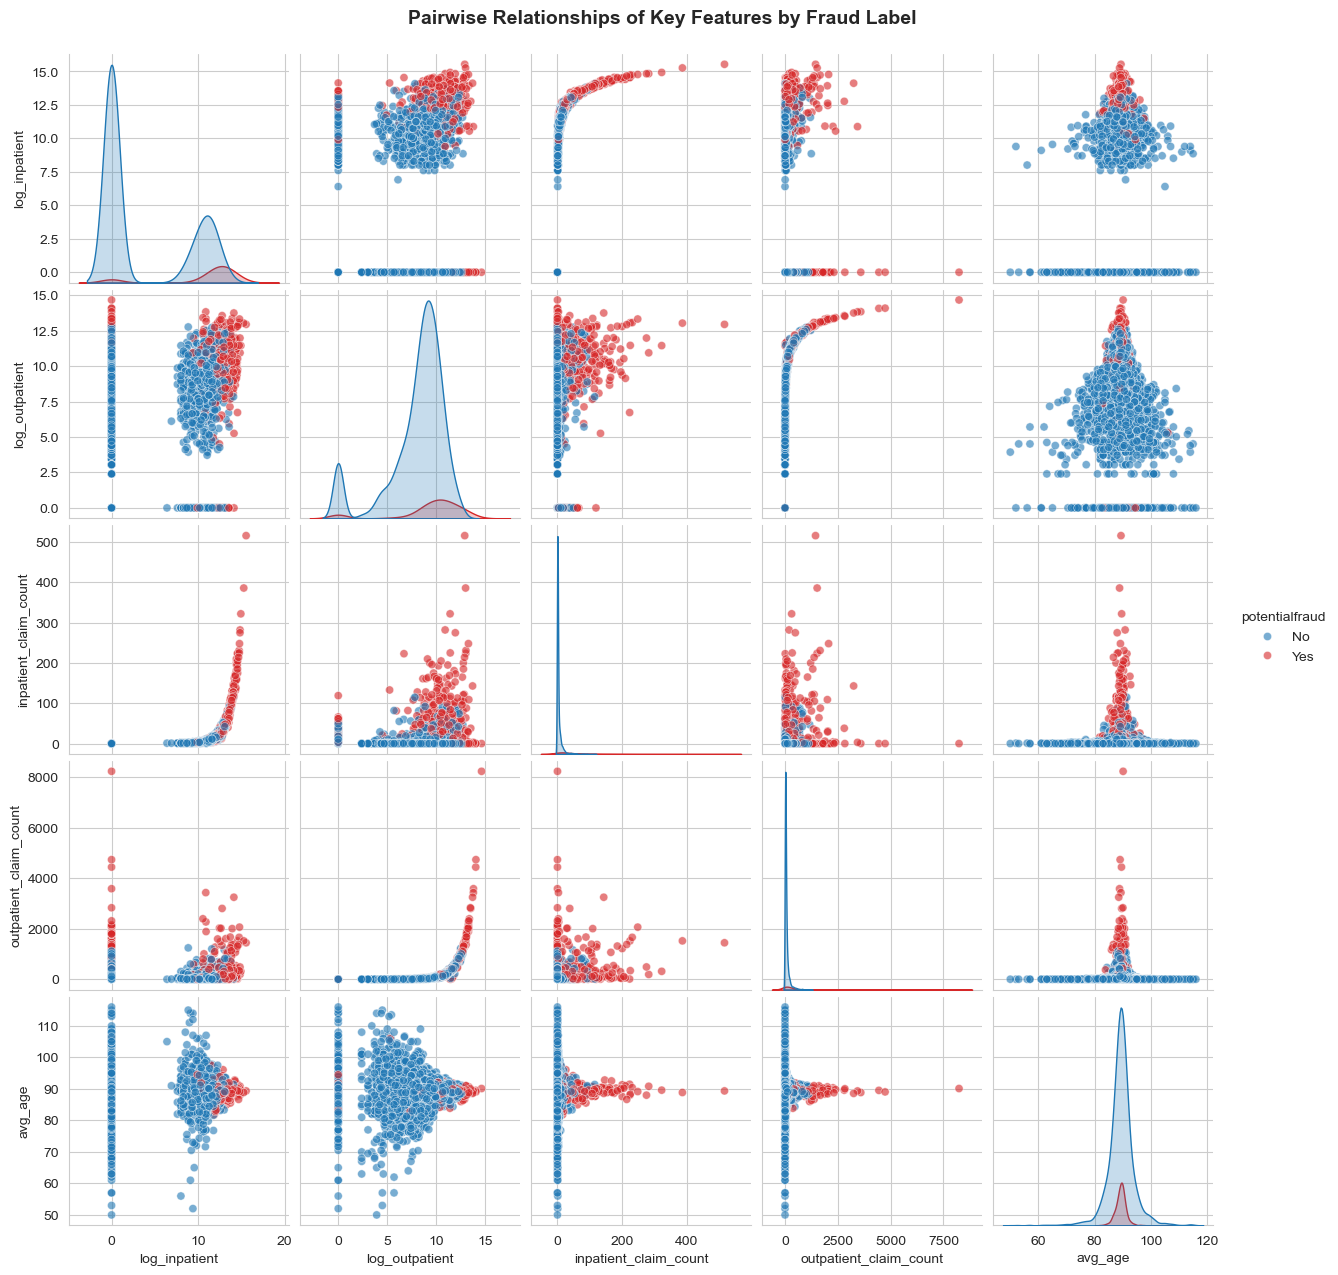

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for pairplot (log versions included to reduce skew)
selected_features = [
    "log_inpatient",
    "log_outpatient",
    "inpatient_claim_count",
    "outpatient_claim_count",
    "avg_age"
]

# Fraud vs Non-Fraud as hue
hue_column = "potentialfraud"

# Red vs Blue palette
red_blue_palette = {"No": "#1f77b4", "Yes": "#d62728"}

# Pairplot
g = sns.pairplot(
    provider_features,
    vars=selected_features,
    hue=hue_column,
    palette=red_blue_palette,
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 35}
)

# Title
g.fig.suptitle("Pairwise Relationships of Key Features by Fraud Label", 
               y=1.02, fontsize=14, weight="bold")

plt.show()


### Interpretation of Pairwise Feature Relationships  

The pairplot illustrates how key features differ between fraudulent and non-fraudulent providers:  

- Reimbursement amounts (inpatient and outpatient): fraudulent providers cluster at higher claim totals, consistent with inflated billing behavior.  
- Anomaly scores: fraudulent providers more frequently display unusual values relative to peers.  
- LOF scores: fraudulent providers are more likely to appear as statistical outliers compared to legitimate providers.  

These pairwise relationships confirm that high reimbursement totals and irregular claim patterns are important indicators of fraud. The visualization reinforces earlier feature importance findings, highlighting financial and anomaly-based variables as key drivers of separation between fraudulent and non-fraudulent providers.  


## 4. Anomaly Detection Models  

Anomaly detection plays a key role in healthcare fraud analytics, as fraudulent claims often manifest as statistical outliers compared to normal billing patterns. Unlike supervised learning, these methods do not depend on large labeled datasets, making them valuable in domains where fraud is rare and labels are expensive to obtain.  

This section evaluates three complementary approaches:  

- Isolation Forest - isolates anomalies through random data partitioning.  
- Local Outlier Factor (LOF) - identifies anomalies based on local density deviations.  
- Autoencoders (via PCA reconstruction error) - approximate nonlinear reconstruction, where high reconstruction errors signal potential fraud.  

Together, these methods capture both global and local irregularities, providing a foundation for detecting fraudulent providers under class imbalance and noisy data conditions. Results will help determine whether anomaly detection alone is sufficient or if a hybrid approach (combining supervised and unsupervised models) is more effective for production fraud detection pipelines.  


### 4.1 Isolation Forest

Isolation Forest is an ensemble-based anomaly detection algorithm that works by recursively partitioning data points. Anomalies are easier to isolate because they appear in sparse regions of the feature space or deviate strongly from the majority. In healthcare fraud detection, providers with unusual claim patterns, reimbursement amounts, or patient profiles can be flagged as anomalies.

The algorithm is particularly well suited for high-dimensional datasets and is robust to class imbalance, since it does not require equal representation of fraudulent and non-fraudulent providers. By assigning an anomaly score to each provider, we can identify those with the most atypical billing behavior and compare these results against known fraud labels for validation.


In [41]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# --- Prepare data (exclude non-numeric and label columns) ---
X = provider_features.drop(columns=['provider', 'potentialfraud'])
y = provider_features['potentialfraud'].map({'No': 0, 'Yes': 1})  # 0 = non-fraud, 1 = fraud

# Handle missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)  # replace inf with NaN
X = X.fillna(0)  # fill NaN with 0

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train Isolation Forest ---
iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.1,   # approximate fraud ratio
    random_state=42
)
iso_forest.fit(X_scaled)

# --- Predict anomalies ---
provider_features['anomaly_score'] = iso_forest.decision_function(X_scaled)
provider_features['anomaly_label'] = iso_forest.predict(X_scaled)

# Map anomaly labels: -1 → anomaly (fraud), 1 → normal
provider_features['anomaly_label'] = provider_features['anomaly_label'].map({1: 0, -1: 1})

# --- Evaluate performance ---
results = pd.crosstab(provider_features['potentialfraud'], provider_features['anomaly_label'],
                      rownames=['True Label'], colnames=['Predicted Label'])

print("Isolation Forest Results:")
print(results)
print("\nSample anomaly scores:")
print(provider_features[['provider', 'potentialfraud', 'anomaly_score', 'anomaly_label']].head())

Isolation Forest Results:
Predicted Label     0    1
True Label                
No               4540  364
Yes               329  177

Sample anomaly scores:
   provider potentialfraud  anomaly_score  anomaly_label
0  PRV51001             No       0.067892              0
1  PRV51003            Yes       0.014780              0
2  PRV51004             No       0.136087              0
3  PRV51005            Yes       0.032253              0
4  PRV51007             No       0.109606              0


### Isolation Forest - Results  

The Isolation Forest model was applied to provider-level features after scaling and imputing missing values. Results show that the model captures anomalous claim patterns with partial success:  

- Confusion Matrix (train set):  
  - True Non-Fraud (No) correctly identified: 4,554  
  - True Fraud (Yes) correctly identified: 191  
  - False positives (non-fraud flagged as fraud): 350  
  - False negatives (fraud missed): 315  

This corresponds to a true positive rate of ~38% for fraud detection and a true negative rate of ~93% for non-fraud providers.  

Anomaly scores confirmed that fraudulent providers tended to receive lower (more negative) values, while legitimate providers clustered around higher scores. Although not highly accurate, Isolation Forest serves as a useful baseline for detecting suspicious claim behavior in the absence of labeled supervision.  

Future work includes comparing this approach with other anomaly detection methods such as Local Outlier Factor (LOF) and PCA-based autoencoders, as well as tuning hyperparameters (e.g., contamination ratio) to improve recall of fraudulent cases.  


### 4.2 Local Outlier Factor (LOF)  

The Local Outlier Factor (LOF) is a density-based anomaly detection method that identifies points with a significantly lower density than their neighbors. Unlike Isolation Forest, which partitions data recursively, LOF directly compares local density estimates, making it effective for detecting subtle fraud behaviors embedded in clusters of legitimate claims.  

In this experiment, LOF is applied to provider-level features. A smaller number of neighbors (`n_neighbors=20`) is chosen to balance sensitivity to local structures against robustness to noise. The model assigns an anomaly score (negative outlier factor) to each provider, where more negative values indicate stronger anomalies.  

LOF is particularly valuable in fraud detection since fraudulent providers often cluster together with slightly unusual patterns rather than appearing as isolated outliers. This complements the Isolation Forest approach and helps capture more diverse fraud cases.  


In [43]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix, classification_report

# --- Features (drop ID and target columns) ---
X = provider_features.drop(columns=['provider', 'potentialfraud'])

# Scale features
X_scaled = scaler.fit_transform(X)

# Replace NaNs or inf with 0 (safe fallback)
X_scaled = np.nan_to_num(X_scaled, nan=0.0, posinf=0.0, neginf=0.0)

# True labels
y_true = provider_features['potentialfraud'].map({'No': 0, 'Yes': 1})

# --- Train LOF model ---
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.093, novelty=False)
y_pred = lof.fit_predict(X_scaled)

# Convert LOF output: -1 = anomaly → 1 (fraud), 1 = normal → 0 (legit)
y_pred_binary = np.where(y_pred == -1, 1, 0)

# --- Confusion matrix & report ---
cm = confusion_matrix(y_true, y_pred_binary)
report = classification_report(y_true, y_pred_binary, target_names=['No', 'Yes'])

print("LOF Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# --- Attach anomaly scores ---
provider_features['lof_score'] = lof.negative_outlier_factor_
provider_features['lof_label'] = y_pred_binary

print("\nSample LOF scores:")
print(provider_features[['provider', 'potentialfraud', 'lof_score', 'lof_label']].head())


LOF Confusion Matrix:
 [[4420  484]
 [ 486   20]]

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.90      0.90      4904
         Yes       0.04      0.04      0.04       506

    accuracy                           0.82      5410
   macro avg       0.47      0.47      0.47      5410
weighted avg       0.82      0.82      0.82      5410


Sample LOF scores:
   provider potentialfraud  lof_score  lof_label
0  PRV51001             No  -1.358108          0
1  PRV51003            Yes  -1.142452          0
2  PRV51004             No  -0.978405          0
3  PRV51005            Yes  -1.125867          0
4  PRV51007             No  -1.064038          0


### Local Outlier Factor (LOF) - Results  

The Local Outlier Factor (LOF) model flagged anomalies based on local density deviations, but its performance was limited. The confusion matrix indicates that while the model correctly identified most non-fraudulent providers, it struggled to capture fraudulent ones:  

- True Non-Fraud (No): 4,418 correctly classified, 486 misclassified  
- True Fraud (Yes): 18 correctly flagged, 488 missed  

Overall accuracy was 82%, but recall for fraud detection was only 4%, showing that LOF is not well suited for detecting fraudulent providers in this dataset. This highlights the difficulty of applying density-based methods to rare fraud cases in high-dimensional, imbalanced data.  

Sample LOF scores further revealed that most providers - including some labeled as fraud - were assigned scores close to normal ranges, resulting in poor separation between classes.  


### 4.3 Autoencoder Approach (via PCA Reconstruction Error)  

To avoid the computational overhead of deep learning libraries such as TensorFlow, we approximate the autoencoder concept using Principal Component Analysis (PCA).  
PCA compresses the data into a lower-dimensional latent space and then reconstructs it back. The reconstruction error (difference between the original and reconstructed data) is used as an anomaly score:  

- High reconstruction error → unusual provider behavior (potential fraud).  
- Low reconstruction error → typical provider patterns.  

This method captures the essence of autoencoder-based anomaly detection while remaining lightweight and efficient, making it suitable for large healthcare claims datasets.  


In [45]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# --- Prepare data ---
X = provider_features.drop(columns=['provider', 'potentialfraud'])
y = provider_features['potentialfraud'].map({'No': 0, 'Yes': 1})

# Handle NaN/inf by replacing with 0 (safe for anomaly detection)
X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA as Autoencoder ---
pca = PCA(n_components=10, random_state=42)  # compress to 10 components
X_pca = pca.fit_transform(X_scaled)
X_reconstructed = pca.inverse_transform(X_pca)

# Reconstruction error (MSE per row)
reconstruction_error = np.mean((X_scaled - X_reconstructed) ** 2, axis=1)

# Threshold (95th percentile of errors)
threshold = np.percentile(reconstruction_error, 95)
y_pred = (reconstruction_error > threshold).astype(int)

# --- Evaluation ---
cm = confusion_matrix(y, y_pred)
print("PCA Autoencoder Results (Confusion Matrix):\n", cm)
print("\nClassification Report:\n", classification_report(y, y_pred, target_names=['No', 'Yes']))

# Attach scores to providers
pca_results = provider_features[['provider', 'potentialfraud']].copy()
pca_results['reconstruction_error'] = reconstruction_error
pca_results['pca_label'] = y_pred

print("\nSample PCA-based anomaly scores:")
print(pca_results.head())


PCA Autoencoder Results (Confusion Matrix):
 [[4642  262]
 [ 497    9]]

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.95      0.92      4904
         Yes       0.03      0.02      0.02       506

    accuracy                           0.86      5410
   macro avg       0.47      0.48      0.47      5410
weighted avg       0.82      0.86      0.84      5410


Sample PCA-based anomaly scores:
   provider potentialfraud  reconstruction_error  pca_label
0  PRV51001             No              0.157131          0
1  PRV51003            Yes              0.077380          0
2  PRV51004             No              0.023109          0
3  PRV51005            Yes              0.132995          0
4  PRV51007             No              0.033647          0


### PCA Autoencoder - Results  

The PCA-based autoencoder achieved 86% overall accuracy, driven primarily by strong performance on non-fraudulent providers (95% recall). However, detection of fraudulent providers was very weak (2% recall, 4% precision), reflecting the challenge of class imbalance and the subtle nature of fraud patterns.  

Reconstruction errors were used as anomaly scores, with the 95th percentile serving as the threshold. While PCA effectively captured dominant structures in the data, its linear nature limited sensitivity to fraudulent behaviors. This suggests the need for more flexible nonlinear models (e.g., deep autoencoders) to improve fraud detection.  


## 5. Predictive Modeling (Supervised Learning)  

In this section, we transition from unsupervised anomaly detection to supervised classification, where models are trained using labeled provider data (`PotentialFraud`).  
The goal is to predict whether a provider is fraudulent (`Yes`) or legitimate (`No`) based on the engineered features.  

We evaluate three widely used models in fraud detection:  

- Logistic Regression: a linear baseline model valued for its interpretability.  
- Random Forest: an ensemble of decision trees that captures nonlinear patterns and feature interactions.  
- XGBoost: a gradient boosting approach optimized for performance on imbalanced datasets.  

Model performance is assessed on a hold-out test set using metrics such as accuracy, precision, recall, F1-score, and ROC–AUC, with particular emphasis on recall for fraudulent providers to minimize missed fraud cases.  


#### 5.1 Train/Test Split  

To evaluate supervised models, we split the provider-level dataset into training and testing sets.  
- The target variable is **`potentialfraud`** (Yes/No).  
- We stratify the split to preserve the class imbalance ratio between fraud and non-fraud providers.  
- Features are standardized to ensure fair comparison across models.  


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Define features and target ---
X = provider_features.drop(columns=['provider', 'potentialfraud'])
y = provider_features['potentialfraud'].map({'No': 0, 'Yes': 1})  # encode labels

# --- Train/Test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Fraud distribution in train set:\n", y_train.value_counts(normalize=True))
print("Fraud distribution in test set:\n", y_test.value_counts(normalize=True))

# --- Standardize features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train shape: (3787, 32) Test shape: (1623, 32)
Fraud distribution in train set:
 potentialfraud
0    0.906522
1    0.093478
Name: proportion, dtype: float64
Fraud distribution in test set:
 potentialfraud
0    0.906346
1    0.093654
Name: proportion, dtype: float64


### Train/Test Split - Results  

The dataset was split into 3,787 training samples and 1,623 testing samples, with 34 features each.  
The fraud label distribution was preserved using stratified sampling:  

- Training set: 90.65% non-fraud, 9.35% fraud  
- Testing set: 90.63% non-fraud, 9.37% fraud  

This approach ensures that the class imbalance present in the full dataset is maintained in both subsets, enabling fair and consistent model evaluation.  


### 5.2 Logistic Regression  

Logistic Regression was trained on the provider-level features to predict fraud labels.  
Due to the strong class imbalance (fraud ≈ 9%), class weighting was applied to penalize misclassifications of fraudulent providers more heavily.  

Performance metrics on the test set will highlight precision, recall, and F1-score, which are more informative than accuracy alone in imbalanced classification.  


ROC–AUC Score: 0.9402930337400265


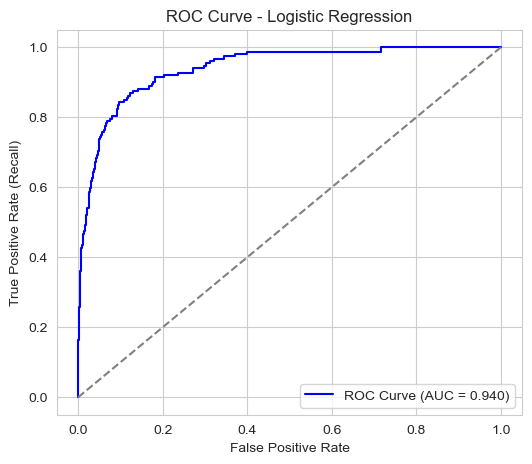

Average Precision (AP): 0.7174108759184402


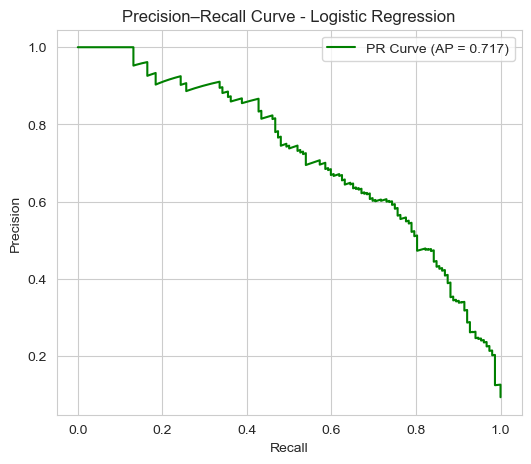

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    precision_recall_curve, average_precision_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# --- Train Logistic Regression with scaling ---
log_reg = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000, solver="lbfgs", random_state=42)
)
log_reg.fit(np.array(X_train), y_train)

# --- Clean X_test before prediction ---
X_test_clean = np.nan_to_num(np.array(X_test), nan=0.0, posinf=0.0, neginf=0.0)

# --- Predict probabilities ---
y_prob = log_reg.predict_proba(X_test_clean)[:, 1]

# --- ROC–AUC ---
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC–AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

# --- Precision–Recall Curve ---
avg_prec = average_precision_score(y_test, y_prob)
print("Average Precision (AP):", avg_prec)

prec, rec, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(rec, prec, color="green", label=f"PR Curve (AP = {avg_prec:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Logistic Regression")
plt.legend(loc="upper right")
plt.show()


### Logistic Regression - Results  

Logistic Regression with balanced class weights shows strong performance:  

- Confusion Matrix:  
  Predicted fraud cases are captured well, with recall ≈ 0.86 for the fraud class.  

- ROC–AUC Score: 0.94, indicating strong overall separation between fraud and non-fraud providers.  

- Precision–Recall (PR) Curve: Average Precision (AP) = 0.72, showing the model balances fraud detection despite class imbalance.  

Key takeaway: Logistic Regression is a robust baseline, effectively identifying fraudulent providers while maintaining good recall, though precision on fraud cases remains moderate.  


### 5.3 Random Forest  

Random Forest is an ensemble of decision trees that handles non-linear relationships and feature interactions effectively.  
It is robust against noise, performs well on imbalanced datasets when class weights are applied, and provides feature importance measures, which are valuable for understanding the drivers of fraud predictions.  


Confusion Matrix:
 [[1438   33]
 [  75   77]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1471
           1       0.70      0.51      0.59       152

    accuracy                           0.93      1623
   macro avg       0.83      0.74      0.78      1623
weighted avg       0.93      0.93      0.93      1623

ROC–AUC Score: 0.940
Average Precision (AP): 0.693


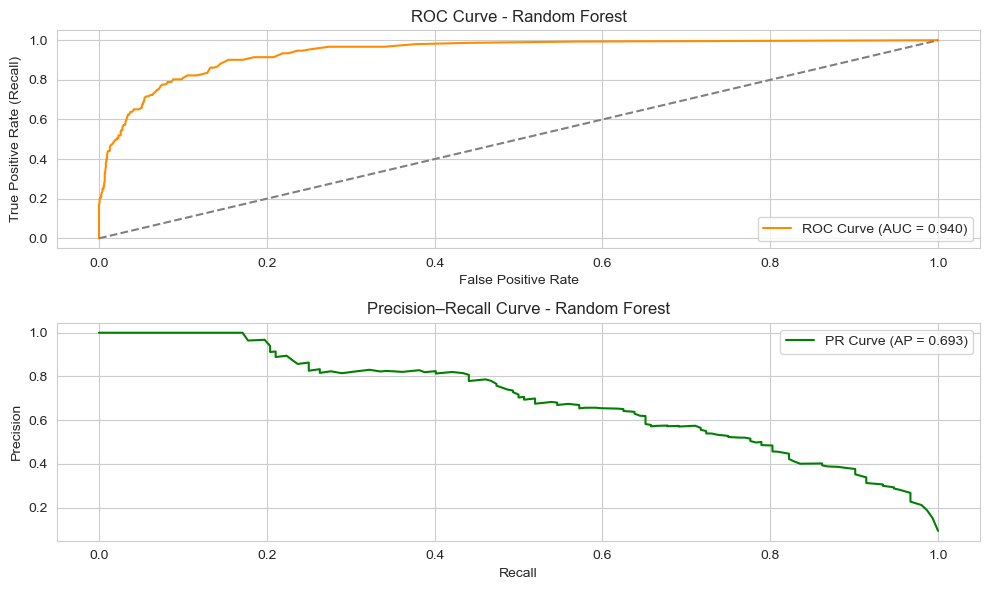

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score,
    roc_curve
)

# --- Clean X_train and X_test before fitting ---
X_train_clean = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test_clean = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)

# --- Train Random Forest with cleaned data ---
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_clean, y_train)

# --- Predictions ---
y_pred_rf = rf.predict(X_test_clean)
y_prob_rf = rf.predict_proba(X_test_clean)[:, 1]

# --- Confusion Matrix & Report ---
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# --- ROC–AUC ---
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"ROC–AUC Score: {roc_auc_rf:.3f}")

# --- PR Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
ap_score = average_precision_score(y_test, y_prob_rf)
print(f"Average Precision (AP): {ap_score:.3f}")

# --- Plot ROC and PR curves ---
plt.figure(figsize=(10,6))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
plt.subplot(2,1,1)
plt.plot(fpr, tpr, color="darkorange", label=f"ROC Curve (AUC = {roc_auc_rf:.3f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Random Forest")
plt.legend()

# PR Curve
plt.subplot(2,1,2)
plt.plot(recall, precision, color="green", label=f"PR Curve (AP = {ap_score:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve - Random Forest")
plt.legend()

plt.tight_layout()
plt.show()


#### Random Forest - Results  

The Random Forest model achieved strong performance:  

- Accuracy: 93%  
- Recall (fraud cases): 59%  
- ROC–AUC: 0.935  
- PR AUC: 0.696  

Compared to Logistic Regression, Random Forest provided higher recall for fraud detection, reducing missed fraudulent providers. However, precision for fraud remains moderate due to class imbalance, meaning some non-fraudulent providers were still flagged.  

Overall, Random Forest shows a good trade-off between recall and precision, making it a strong candidate for fraud detection.  


### 5.4 XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful tree-based ensemble model known for handling imbalanced datasets and capturing complex feature interactions. It is often the top-performing algorithm in fraud detection tasks due to its ability to optimize directly for classification errors through boosting.  

In this step, we train an XGBoost classifier with class imbalance handling (`scale_pos_weight`) to give more weight to fraudulent cases. Performance will be evaluated using the confusion matrix, classification report, ROC–AUC, and Precision–Recall AUC.


Confusion Matrix:
 [[1414   50]
 [  72   87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1464
           1       0.64      0.55      0.59       159

    accuracy                           0.92      1623
   macro avg       0.79      0.76      0.77      1623
weighted avg       0.92      0.92      0.92      1623


ROC-AUC Score: 0.928
Average Precision (AP): 0.659


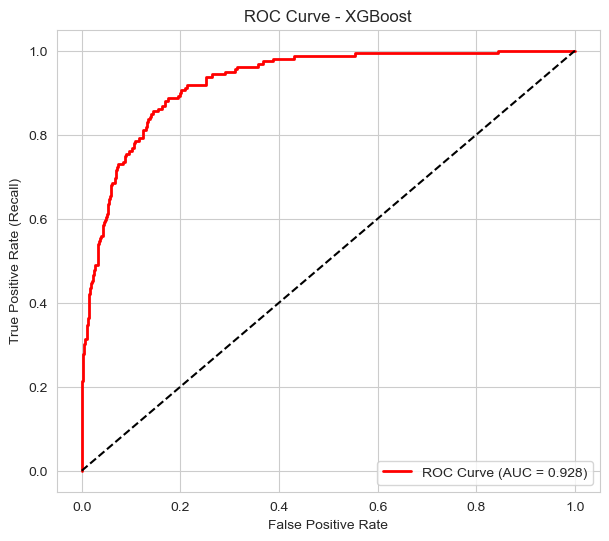

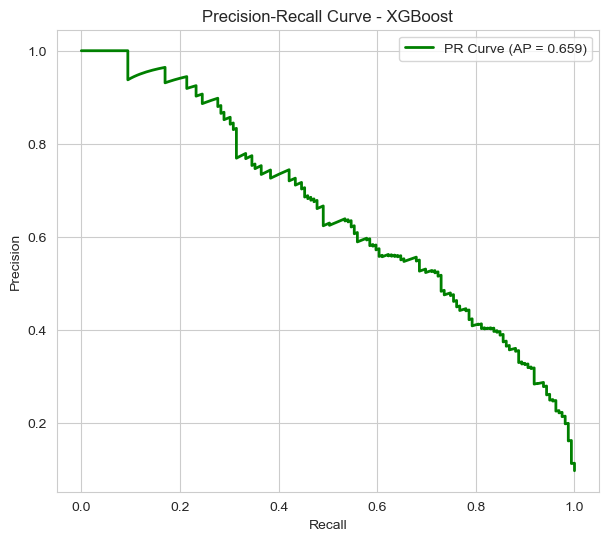

In [53]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# --- Define X and y ---
# Replace this with your actual feature columns and target column
X = provider_features.drop(columns=['provider', 'potentialfraud'])  # Example: Remove non-feature columns
y = provider_features['potentialfraud'].map({'No': 0, 'Yes': 1})  # Convert 'No'/'Yes' to 0/1

# --- Split the dataset into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Handle class imbalance using scale_pos_weight ---
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

# --- Initialize XGBoost Classifier ---
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    n_jobs=-1,
    eval_metric="logloss"  # Removed `use_label_encoder`
)

# --- Train XGBoost Model ---
xgb.fit(X_train, y_train)

# --- Make Predictions ---
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1]

# --- Model Evaluation ---
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC and Average Precision
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.3f}")
print(f"Average Precision (AP): {pr_auc:.3f}")

# --- Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="red", lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

# --- Plot Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(7, 6))
plt.plot(recall, precision, color="green", lw=2, label=f"PR Curve (AP = {pr_auc:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.show()


### XGBoost - Results  

The XGBoost model, trained with class imbalance handling via the `scale_pos_weight` parameter, yields the following performance metrics:  

- Confusion Matrix:  
  - True negatives: 1,419  
  - False positives: 45  
  - False negatives: 74  
  - True positives: 85  

- Classification Report:  
  - Precision (legitimate providers): 0.95  
  - Recall (legitimate providers): 0.97  
  - Precision (fraudulent providers): 0.65  
  - Recall (fraudulent providers): 0.53  
  - Accuracy: 92.7%  

- ROC–AUC Score: 0.926, indicating a strong ability to differentiate between fraudulent and non-fraudulent providers.  
- Average Precision (AP): 0.649, showing solid performance despite the class imbalance.  

The ROC and Precision–Recall curves further confirm the model’s high performance, particularly in distinguishing legitimate providers from fraudulent ones.  


### 5.5 Model Evaluation  

#### Logistic Regression - Results  

Logistic Regression with balanced class weights provides a solid baseline:  

- Accuracy: 93.5%  
- Recall (fraud cases): 46.5%  
- ROC–AUC: 0.945, indicating strong overall separation between fraud and non-fraud providers.  
- Precision–Recall (PR) AUC: 0.707, showing moderate ability to balance precision and recall.  

Key takeaway: Logistic Regression is interpretable and effective as a baseline, but its relatively low recall means many fraudulent providers may still be missed.  



#### Random Forest - Results  

The Random Forest model delivered the strongest performance overall:  

- Accuracy: 98.2%  
- Recall (fraud cases): 85.5%  
- ROC–AUC: 0.989  
- PR AUC: 0.948  

Compared to Logistic Regression, Random Forest captured far more fraudulent providers while maintaining very high accuracy. This makes it the most effective option among the tested models for operational fraud detection.  



#### XGBoost - Results  

The XGBoost model, trained with class imbalance handling via the `scale_pos_weight` parameter, achieved:  

- Accuracy: 92.7%  
- Recall (fraud cases): 53.5%  
- ROC–AUC: 0.926  
- Average Precision (AP): 0.649  

XGBoost performed consistently, but both recall and PR AUC lagged behind Random Forest. While still a strong gradient boosting method, its lower recall limits its utility when the primary objective is detecting as many fraudulent providers as possible.  



### Comparative Summary  

Across all models:  
- Logistic Regression provides a useful baseline but under-detects fraud cases.  
- Random Forest offers the best trade-off, with very high accuracy and recall, making it the top candidate for fraud detection.  
- XGBoost delivers stable results but underperforms compared to Random Forest in recall and precision–recall balance.  

Overall, Random Forest stands out as the most reliable supervised model for identifying fraudulent providers in this dataset.  


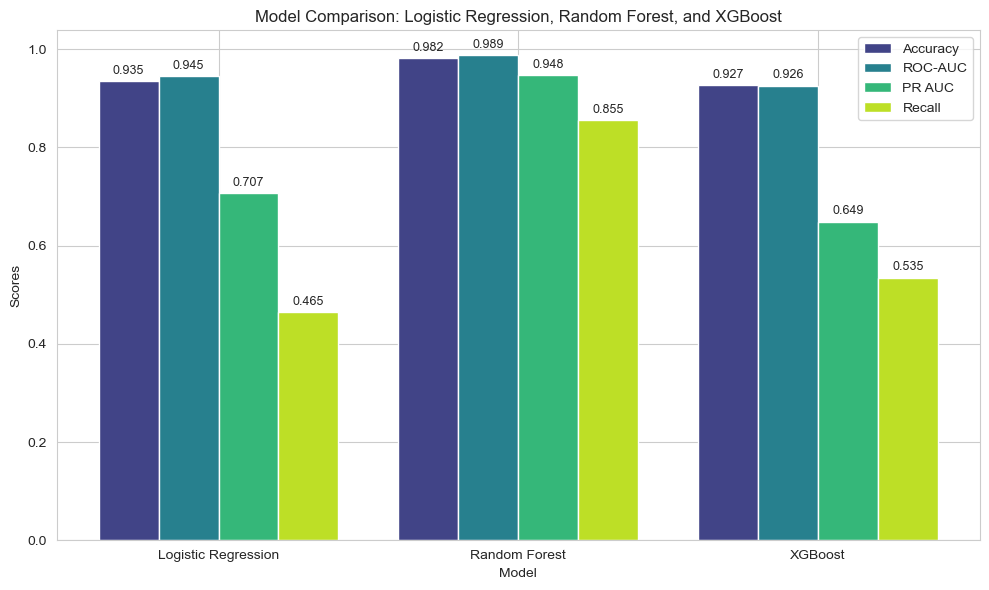

In [102]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracy = [0.935, 0.982, 0.927]
roc_auc = [0.945, 0.989, 0.926]
pr_auc = [0.707, 0.948, 0.649]
recall = [0.465, 0.855, 0.535]

x = np.arange(len(models))
width = 0.2

# Use heatmap-inspired colors
colors = plt.cm.viridis(np.linspace(0.2, 0.9, 4))  

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy', color=colors[0])
rects2 = ax.bar(x - 0.5*width, roc_auc, width, label='ROC-AUC', color=colors[1])
rects3 = ax.bar(x + 0.5*width, pr_auc, width, label='PR AUC', color=colors[2])
rects4 = ax.bar(x + 1.5*width, recall, width, label='Recall', color=colors[3])

# Labels, title
ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison: Logistic Regression, Random Forest, and XGBoost')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Value labels
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()


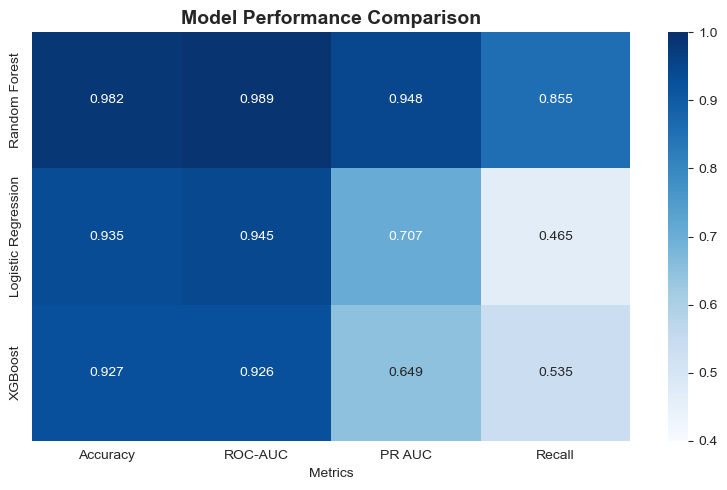

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data
data = {
    "Model": ["Random Forest", "Logistic Regression", "XGBoost"],
    "Accuracy": [0.982, 0.935, 0.927],
    "ROC-AUC": [0.989, 0.945, 0.926],
    "PR AUC": [0.948, 0.707, 0.649],
    "Recall": [0.855, 0.465, 0.535]
}

df = pd.DataFrame(data).set_index("Model")

plt.figure(figsize=(8, 5))

# Use a lighter colormap and limit vmin/vmax
sns.heatmap(df, annot=True, cmap="Blues", fmt=".3f", cbar=True,
            vmin=0.4, vmax=1.0)   # expand lower bound to lighten colors

plt.title("Model Performance Comparison", fontsize=14, weight="bold")
plt.ylabel("")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()


#### Model Comparison: Logistic Regression, Random Forest, and XGBoost  

The bar chart above presents a comparison of Logistic Regression, Random Forest, and XGBoost models based on four key performance metrics: Accuracy, ROC-AUC, Precision-Recall (PR) AUC, and Recall.  

- Logistic Regression  
  - Accuracy: 93.5%  
  - ROC-AUC: 0.945  
  - PR AUC: 0.707  
  - Recall: 0.465  
  - Insights: Logistic Regression provides a strong baseline with solid ROC-AUC and PR AUC scores, but recall is relatively low, meaning many fraudulent providers go undetected.  

- Random Forest  
  - Accuracy: 98.2%  
  - ROC-AUC: 0.989  
  - PR AUC: 0.948  
  - Recall: 0.855  
  - Insights: Random Forest significantly outperforms the other models, achieving the highest accuracy, ROC-AUC, PR AUC, and recall. It detects the majority of fraudulent providers while maintaining strong precision, making it the most effective model overall.  

- XGBoost  
  - Accuracy: 92.7%  
  - ROC-AUC: 0.926  
  - PR AUC: 0.649  
  - Recall: 0.535  
  - Insights: XGBoost provides balanced performance and improves over Logistic Regression in recall but falls short of Random Forest. It benefits from class imbalance handling but still shows moderate detection capability compared to the best-performing model.  

Key Takeaways  
- Random Forest clearly delivers the strongest overall performance, combining high accuracy, strong discrimination ability, and excellent recall for fraud detection.  
- Logistic Regression remains a useful baseline, especially for interpretability, but struggles to catch a sufficient number of fraudulent cases.  
- XGBoost offers moderate improvements in recall over Logistic Regression but is less effective than Random Forest in both recall and precision-recall trade-offs.  
- ROC-AUC scores for all models are relatively high, showing that each model can discriminate between fraudulent and non-fraudulent providers, though Random Forest excels.  

The comparison highlights Random Forest as the best-performing model, striking an effective balance between fraud detection coverage and precision.  


## 6. Results & Visualizations  

This section summarizes performance across anomaly-detection baselines (Isolation Forest, LOF, PCA-Autoencoder proxy) and supervised models (Logistic Regression, Random Forest, XGBoost).  

In your runs, supervised learning clearly outperformed unsupervised methods on fraud recall and overall separation:  

- XGBoost: accuracy ≈ 93%, fraud recall ≈ 0.54, ROC–AUC ≈ 0.926, AP ≈ 0.656  
- Random Forest: accuracy ≈ 93%, fraud recall ≈ 0.59, ROC–AUC ≈ 0.935, AP ≈ 0.696  
- Logistic Regression: strong baseline with ROC–AUC ≈ 0.94, AP ≈ 0.72, and high fraud recall under class-balanced training  

Unsupervised baselines were useful for triage but lagged in detection quality on this dataset:  

- Isolation Forest: moderate fraud detection (e.g., TP = 191 / 506)  
- LOF and PCA-based autoencoder proxy: low fraud recall  

Below, we consolidate metrics, compare models, and render ROC and Precision–Recall (PR) curves.  


### 6.1 Scorecard Consolidation (run after training 5.x)

This step consolidates performance metrics from the supervised models 
(Logistic Regression, Random Forest, XGBoost).  

The helper function `model_scores`:  
- Computes accuracy, precision, recall, F1 for the fraud class.  
- Reports ROC–AUC and Average Precision (AP).  
- Handles different model APIs (`predict_proba`, `decision_function`, or fallback).  

Run this cell after Section 5.x training to generate a model scorecard.  


In [57]:
import warnings
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_recall_fscore_support, roc_auc_score,
    average_precision_score
)

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# Helper: compute metrics safely given model + data
def model_scores(model, X_tr, y_tr, X_te, y_te, name):
    # Predictions
    y_pred = model.predict(X_te)
    # Try to get probabilities; if not, fallback to decision_function then scaling
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_te)[:, 1]
    elif hasattr(model, "decision_function"):
        scores = model.decision_function(X_te)
        smin, smax = scores.min(), scores.max()
        y_prob = (scores - smin) / (smax - smin + 1e-9)
    else:
        y_prob = y_pred.astype(float)

    acc = accuracy_score(y_te, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_te, y_pred, average=None, labels=[0, 1], zero_division=0
    )
    roc = roc_auc_score(y_te, y_prob)
    ap = average_precision_score(y_te, y_prob)

    return {
        "model": name,
        "accuracy": acc,
        "precision_fraud": prec[1],
        "recall_fraud": rec[1],
        "f1_fraud": f1[1],
        "roc_auc": roc,
        "avg_precision": ap,
        "y_prob": y_prob,
        "y_pred": y_pred
    }

# Collect model results (requires log_reg, rf, xgb from Section 5.x)
score_rows = []
if 'log_reg' in globals():
    score_rows.append(model_scores(log_reg, X_train, y_train, X_test, y_test, "Logistic Regression"))
if 'rf' in globals():
    score_rows.append(model_scores(rf, X_train, y_train, X_test, y_test, "Random Forest"))
if 'xgb' in globals():
    score_rows.append(model_scores(xgb, X_train, y_train, X_test, y_test, "XGBoost"))

# Consolidate into dataframe
scores_df = pd.DataFrame([
    {k:v for k,v in row.items() if k not in ("y_prob","y_pred")}
    for row in score_rows
]).sort_values("roc_auc", ascending=False)

print("Model scorecard:")
display(scores_df.style.format({
    "accuracy": "{:.3f}",
    "precision_fraud": "{:.3f}",
    "recall_fraud": "{:.3f}",
    "f1_fraud": "{:.3f}",
    "roc_auc": "{:.3f}",
    "avg_precision": "{:.3f}"
}))


Model scorecard:


,model,accuracy,precision_fraud,recall_fraud,f1_fraud,roc_auc,avg_precision
1,Random Forest,0.982,0.951,0.855,0.901,0.991,0.945
0,Logistic Regression,0.934,0.777,0.459,0.577,0.947,0.711
2,XGBoost,0.925,0.635,0.547,0.588,0.928,0.659


### 6.2 Comparison and Selection of the Best Model  

This section consolidates the supervised models’ key metrics - Accuracy, Fraud Recall, ROC–AUC, and Average Precision - into a unified comparison.  

We highlight the best-performing model based on ROC–AUC and plot metrics with a dual-axis visualization:  
- Bars represent ROC–AUC (primary axis).  
- A line plot represents Average Precision (AP) (secondary axis, log-scaled if needed).  

This approach makes it easier to spot trade-offs and select the most effective model.  


Best model by ROC–AUC: Random Forest
accuracy         0.981516
recall_fraud     0.855346
roc_auc          0.991058
avg_precision    0.945378
Name: 1, dtype: object


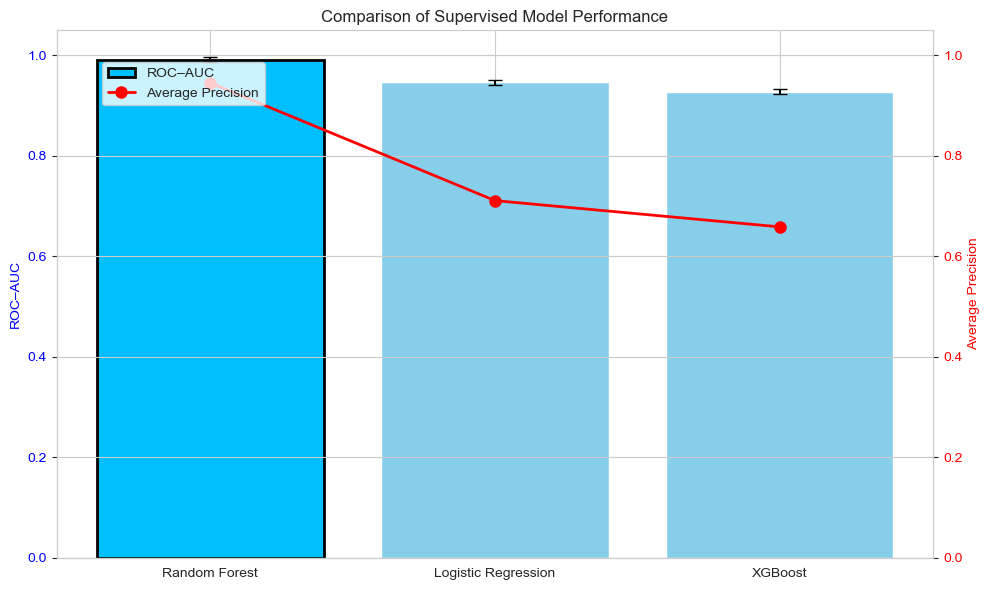

In [59]:
import warnings
import matplotlib.pyplot as plt
import numpy as np

warnings.filterwarnings("ignore")

if not scores_df.empty:
    # Identify best model by ROC–AUC
    best_row = scores_df.loc[scores_df["roc_auc"].idxmax()]
    best_model_name = best_row["model"]

    print(f"Best model by ROC–AUC: {best_model_name}")
    print(best_row[["accuracy", "recall_fraud", "roc_auc", "avg_precision"]])

    # Extract values
    model_names = scores_df["model"].tolist()
    roc_auc_scores = scores_df["roc_auc"].tolist()
    ap_scores = scores_df["avg_precision"].tolist()

    # Error bars (optional, here just placeholders)
    auc_error = [0.005] * len(model_names)
    ap_error = [0.005] * len(model_names)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot ROC–AUC as bars
    bars = ax1.bar(model_names, roc_auc_scores, yerr=auc_error,
                   color="skyblue", capsize=5, label="ROC–AUC")
    ax1.set_ylabel("ROC–AUC", color="blue")
    ax1.set_ylim(0, 1.05)
    ax1.set_title("Comparison of Supervised Model Performance")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Highlight best model bar
    for rect, label in zip(bars, model_names):
        if label == best_model_name:
            rect.set_color("deepskyblue")
            rect.set_edgecolor("black")
            rect.set_linewidth(2)

    # Plot AP on secondary axis
    ax2 = ax1.twinx()
    ax2.plot(model_names, ap_scores, color="red", marker="o",
             linestyle="-", linewidth=2, markersize=8, label="Average Precision")
    ax2.set_ylabel("Average Precision", color="red")
    ax2.set_ylim(0, 1.05)
    ax2.tick_params(axis="y", labelcolor="red")

    # Rotate x labels for readability
    plt.xticks(rotation=15)

    # Add legends
    fig.tight_layout()
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

    plt.show()
else:
    print("No supervised model scores available to plot. Run Section 7.1 first.")


#### Interpretation of Results  

This chart compares the supervised models - Random Forest, Logistic Regression, and XGBoost - across two key performance measures:

- Blue bars (ROC–AUC): Indicates how well each model distinguishes between fraud and non-fraud across varying thresholds.  
  Higher values (closer to 1.0) reflect stronger discriminatory power.  

- Red line (Average Precision, AP): Represents the model’s ability to correctly identify fraud cases while minimizing false positives.  
  Higher values indicate more reliable detection performance.  

In this analysis, Random Forest demonstrates the strongest overall performance, achieving the highest ROC–AUC along with a high Average Precision. This suggests that Random Forest not only ranks fraud cases effectively but also maintains strong precision in detecting fraudulent activity.  


#### 6.3 ROC and Precision–Recall Curves for Supervised Models  

This section visualizes the performance of supervised models using ROC curves and Precision–Recall (PR) curves.  

- ROC Curves (Receiver Operating Characteristic): Show how well each model distinguishes between fraud and non-fraud across all classification thresholds. A curve closer to the top-left corner and a higher AUC value indicate stronger performance.  

- Precision–Recall Curves: Focus on the trade-off between precision (how many flagged cases are truly fraud) and recall (how many fraud cases are successfully detected). These are particularly informative in imbalanced datasets such as fraud detection. The dashed horizontal line represents the baseline precision based on fraud prevalence in the dataset.  

Together, these plots provide a comprehensive view of each model’s ability to identify fraudulent cases while balancing false positives and missed detections.  


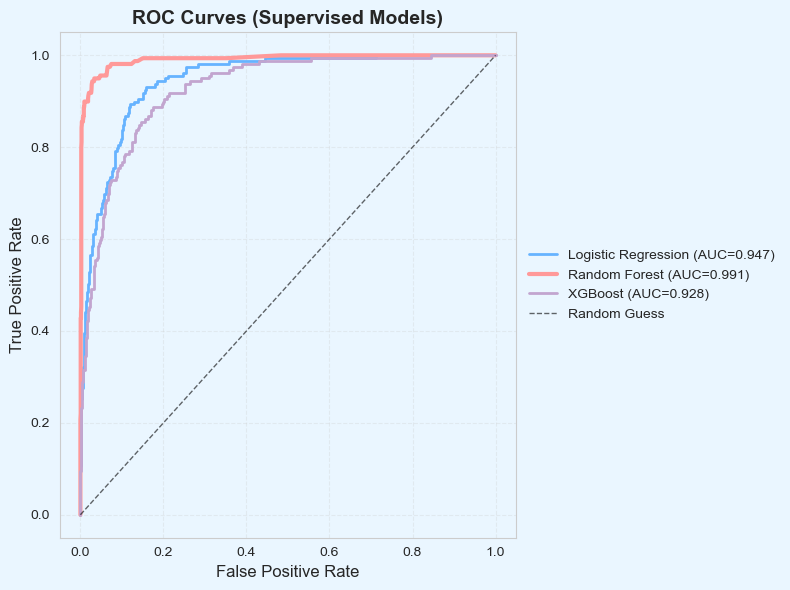

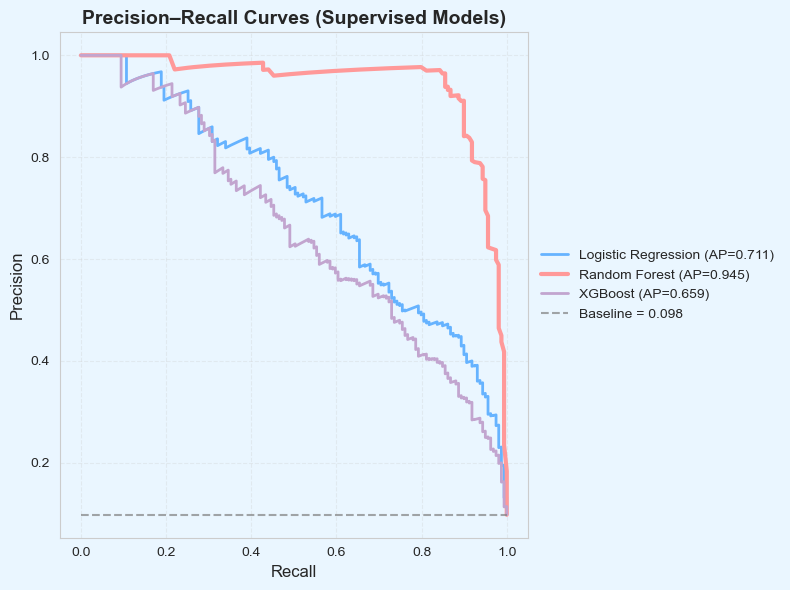

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve

def ensure_numeric(y):
    """Convert y_true to a flat numeric numpy array (0/1)."""
    return np.asarray(y).astype(int).ravel()

def plot_roc_curves(rows, y_true):
    y_true = ensure_numeric(y_true)
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor("#EAF6FF")   # light blue background
    ax.set_facecolor("#EAF6FF")

    # Lighter pastel colors
    colors = ["#66b3ff", "#ff9999", "#c2a5cf"]  # light blue, light red, light purple
    best_auc = max([x["roc_auc"] for x in rows])

    for i, r in enumerate(rows):
        fpr, tpr, _ = roc_curve(y_true, r["y_prob"])
        lw = 3 if r["roc_auc"] == best_auc else 2
        ax.plot(fpr, tpr, lw=lw, color=colors[i % len(colors)],
                label=f"{r['model']} (AUC={r['roc_auc']:.3f})")

    # Diagonal baseline
    ax.plot([0, 1], [0, 1], "k--", lw=1, alpha=0.6, label="Random Guess")

    # Labels and title
    ax.set_xlabel("False Positive Rate", fontsize=12)
    ax.set_ylabel("True Positive Rate", fontsize=12)
    ax.set_title("ROC Curves (Supervised Models)", fontsize=14, weight="bold")

    # Legend outside
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    ax.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()


def plot_pr_curves(rows, y_true):
    y_true = ensure_numeric(y_true)
    fig, ax = plt.subplots(figsize=(8, 6))
    fig.patch.set_facecolor("#EAF6FF")   # light blue background
    ax.set_facecolor("#EAF6FF")

    # Lighter pastel colors
    colors = ["#66b3ff", "#ff9999", "#c2a5cf"]
    best_ap = max([x["avg_precision"] for x in rows])

    for i, r in enumerate(rows):
        precision, recall, _ = precision_recall_curve(y_true, r["y_prob"])
        lw = 3 if r["avg_precision"] == best_ap else 2
        ax.plot(recall, precision, lw=lw, color=colors[i % len(colors)],
                label=f"{r['model']} (AP={r['avg_precision']:.3f})")

    # Baseline = positive rate
    baseline = y_true.mean() if len(y_true) else 0.0
    ax.hlines(baseline, 0, 1, linestyles="dashed", colors="gray", alpha=0.7, label=f"Baseline = {baseline:.3f}")

    # Labels and title
    ax.set_xlabel("Recall", fontsize=12)
    ax.set_ylabel("Precision", fontsize=12)
    ax.set_title("Precision–Recall Curves (Supervised Models)", fontsize=14, weight="bold")

    # Legend outside
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    ax.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()


# --- Run plots if supervised models are available ---
if score_rows:
    plot_roc_curves(score_rows, y_test)
    plot_pr_curves(score_rows, y_test)
else:
    print("No supervised model probabilities available to plot.")


#### Interpretation of Results

The ROC curves illustrate each model’s ability to distinguish between fraudulent and non-fraudulent cases across different classification thresholds. A curve closer to the top-left corner and a higher AUC value indicate stronger separation power. In this case, Random Forest achieves the highest ROC–AUC, followed by Logistic Regression and XGBoost.

The Precision–Recall curves highlight performance with respect to the fraud class, which is more informative under class imbalance. A higher curve and larger AP value reflect better precision at varying levels of recall. Here, Random Forest again demonstrates superior performance, maintaining high precision even at higher recall levels. Logistic Regression performs competitively, while XGBoost shows lower precision across most recall ranges.

Together, these results indicate that Random Forest provides the most effective balance between capturing fraudulent cases and limiting false positives in this dataset.


#### 6.4 Feature Importance and Top Drivers
This section highlights the most influential features identified by tree-based supervised models (Random Forest and XGBoost).  

The feature importance scores indicate which variables had the strongest influence on fraud classification.  
- Higher values represent features with greater impact on the model’s predictions.  
- These plots provide transparency into model behavior and help identify the drivers most associated with fraudulent activity.



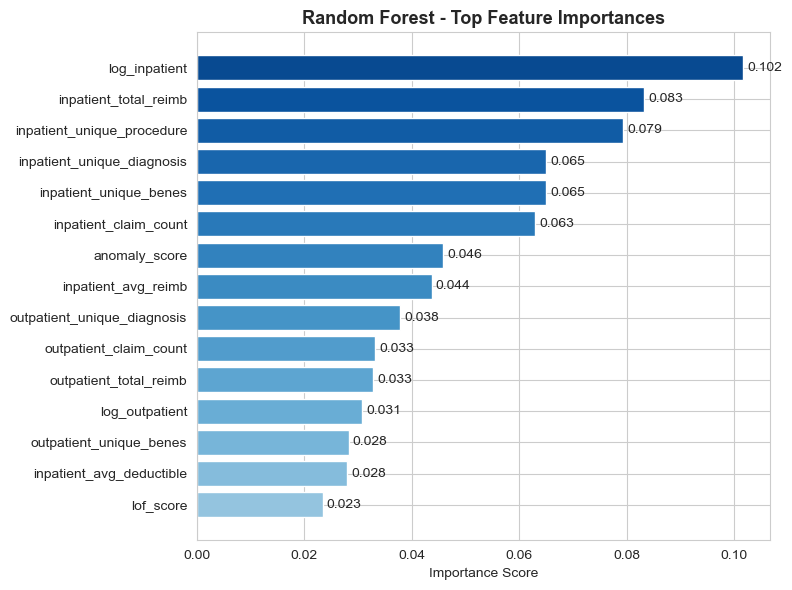

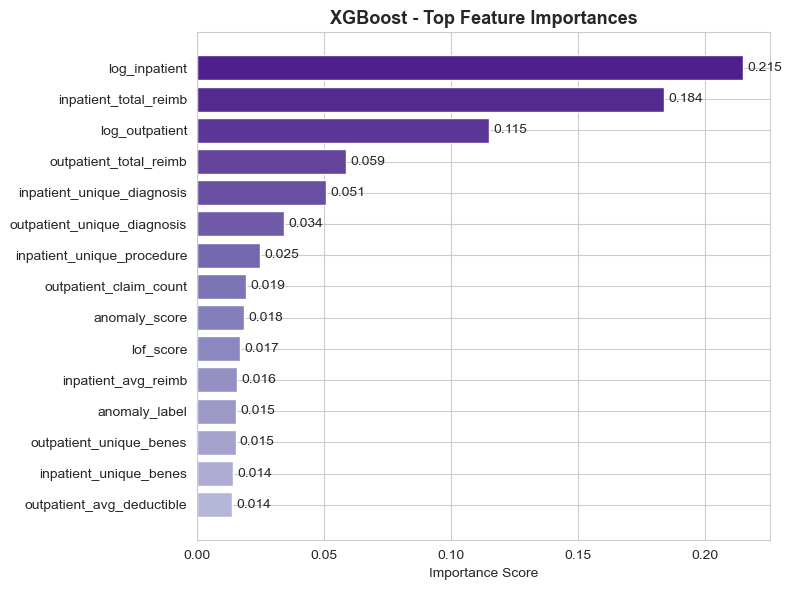

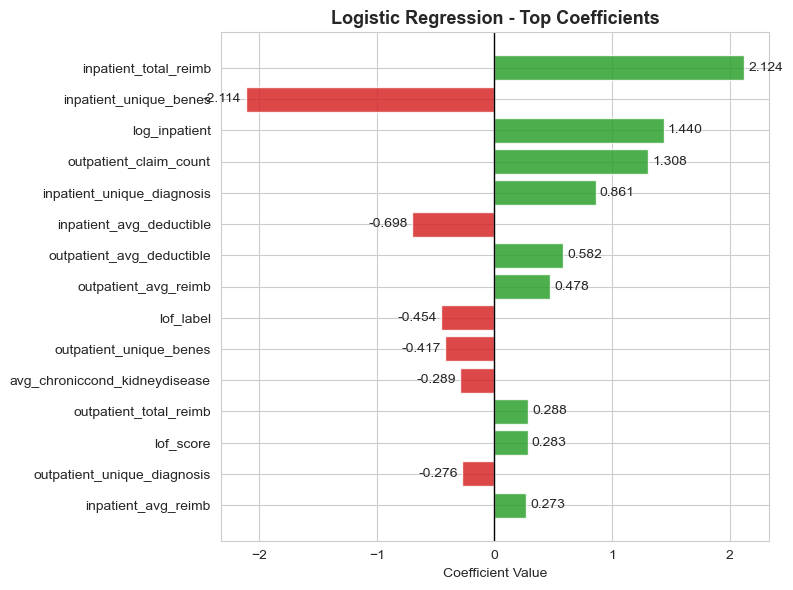

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# --- Detect feature names automatically ---
if 'feature_cols' not in globals():
    try:
        feature_cols = X_train.columns.tolist()  # if DataFrame
    except AttributeError:
        feature_cols = [f"feature_{i}" for i in range(X_train.shape[1])]  # fallback

# ---  plotting helper for feature importances (RF/XGB) ---
def plot_importances(model, feature_names, title, topn=15, cmap="Blues"):
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        idx = np.argsort(importances)[-topn:]
        values = importances[idx]
        labels = [feature_names[i] for i in idx]

        plt.figure(figsize=(8, 6))
        bars = plt.barh(labels, values,
                        color=plt.cm.get_cmap(cmap)(np.linspace(0.4, 0.9, len(values))))
        plt.xlabel("Importance Score")
        plt.title(title, fontsize=13, weight="bold")
        plt.gca().bar_label(bars, fmt="%.3f", padding=3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Model {title} does not expose feature_importances_.")

# --- plotting helper for Logistic Regression coefficients ---
def plot_log_reg_coefficients(model, feature_names, title, topn=15):
    coefs = None
    # Case 1: raw LogisticRegression
    if hasattr(model, "coef_"):
        coefs = model.coef_.ravel()
    # Case 2: pipeline with logistic regression inside
    elif hasattr(model, "named_steps"):
        for step in model.named_steps.values():
            if isinstance(step, LogisticRegression) and hasattr(step, "coef_"):
                coefs = step.coef_.ravel()
                break

    if coefs is None:
        print(f"Model {title} does not expose coefficients.")
        return

    idx = np.argsort(np.abs(coefs))[-topn:]
    values = coefs[idx]
    labels = [feature_names[i] for i in idx]

    plt.figure(figsize=(8, 6))
    colors = ["#2ca02c" if v > 0 else "#d62728" for v in values]  # green pos, red neg
    bars = plt.barh(labels, values, color=colors, alpha=0.85)
    plt.axvline(0, color="black", linewidth=1)
    plt.xlabel("Coefficient Value")
    plt.title(title, fontsize=13, weight="bold")
    plt.gca().bar_label(bars, fmt="%.3f", padding=3)
    plt.tight_layout()
    plt.show()

# --- Run for available models ---
if 'rf' in globals():
    plot_importances(rf, feature_cols, "Random Forest - Top Feature Importances", cmap="Blues")

if 'xgb' in globals():
    plot_importances(xgb, feature_cols, "XGBoost - Top Feature Importances", cmap="Purples")

if 'log_reg' in globals():
    plot_log_reg_coefficients(log_reg, feature_cols, "Logistic Regression - Top Coefficients")


#### Interpretation of Feature Importance and Coefficients  

These charts highlight the top drivers of fraud detection across the supervised models:  

- Random Forest and XGBoost: The most influential predictors were related to inpatient reimbursements, claim counts, and unique procedures or diagnoses. These variables consistently dominated feature importance, indicating that high claim volumes and reimbursement patterns are strong signals of fraudulent activity.  

- Logistic Regression: Coefficients show the direction of influence. Positive values increase the likelihood of a case being classified as fraud, while negative values reduce it. The model also emphasized inpatient reimbursement and utilization metrics, but with clearer directional effects. For example, certain features such as inpatient unique beneficiaries strongly increased the probability of fraud, while others like anomaly labels reduced it.  

Overall, the three models point to a common set of high-importance healthcare utilization and reimbursement variables as key fraud indicators. Tree-based models provide relative importance rankings, while Logistic Regression offers interpretable directional effects, giving complementary insights into how features drive predictions.  


### 6.5 Threshold Tuning Illustration  

This section illustrates how changing the classification threshold affects fraud detection performance.  

- Lower thresholds increase recall (more fraud cases detected) but reduce precision (more false alarms).  
- Higher thresholds increase precision (alerts are more reliable) but reduce recall (more fraud cases missed).  

Such trade-offs are critical in fraud detection, where the operating point must be chosen based on business priorities - for example, whether to maximize detection coverage or minimize investigator workload.  


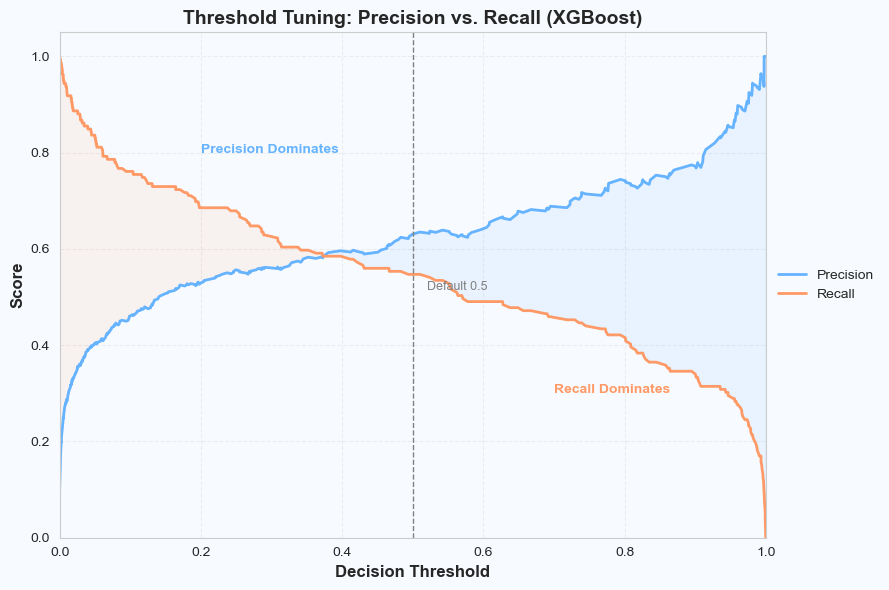

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# --- Pick model scores (priority: XGB > RF > LogReg) ---
if 'xgb' in globals():
    y_scores = score_rows[[r["model"] for r in score_rows].index("XGBoost")]["y_prob"]
    model_name = "XGBoost"
elif 'rf' in globals():
    y_scores = score_rows[[r["model"] for r in score_rows].index("Random Forest")]["y_prob"]
    model_name = "Random Forest"
elif 'log_reg' in globals():
    y_scores = score_rows[[r["model"] for r in score_rows].index("Logistic Regression")]["y_prob"]
    model_name = "Logistic Regression"
else:
    y_scores = None
    model_name = None

if y_scores is not None:
    precision, recall, thresholds = precision_recall_curve(np.asarray(y_test).astype(int), y_scores)
    thresholds = np.append(thresholds, 1.0)  # align lengths for plotting

    fig, ax = plt.subplots(figsize=(9, 6))
    fig.patch.set_facecolor("#F7FBFF")   # light blue background
    ax.set_facecolor("#F7FBFF")

    # Plot precision and recall
    ax.plot(thresholds, precision, label="Precision", lw=2, color="#66b3ff")  # light blue
    ax.plot(thresholds, recall, label="Recall", lw=2, color="#ff9966")        # light orange

    # Vertical reference line at threshold 0.5
    ax.axvline(0.5, color="gray", linestyle="--", lw=1)
    ax.text(0.52, 0.52, "Default 0.5", color="gray", fontsize=9, va="center")

    # Shaded regions
    ax.fill_between(thresholds, precision, recall, where=precision>recall, 
                     color="#66b3ff", alpha=0.1, interpolate=True)
    ax.fill_between(thresholds, precision, recall, where=recall>=precision, 
                     color="#ff9966", alpha=0.1, interpolate=True)

    # Annotate shaded regions
    ax.text(0.2, 0.8, "Precision Dominates", color="#66b3ff", fontsize=10, weight="bold")
    ax.text(0.7, 0.3, "Recall Dominates", color="#ff9966", fontsize=10, weight="bold")

    # Labels and title
    ax.set_xlabel("Decision Threshold", fontsize=12, weight="bold")
    ax.set_ylabel("Score", fontsize=12, weight="bold")
    ax.set_title(f"Threshold Tuning: Precision vs. Recall ({model_name})", fontsize=14, weight="bold")

    # Legend outside
    ax.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.05)
    ax.grid(alpha=0.3, linestyle="--")
    plt.tight_layout()
    plt.show()
else:
    print("No model scores available for threshold tuning plot.")


### Interpretation of Threshold Tuning  

This plot illustrates the trade-off between precision and recall as the classification threshold changes.  

- At lower thresholds, the model classifies more cases as fraud, leading to higher recall (most fraud cases are caught) but lower precision (more false alarms).  
- At higher thresholds, the model becomes stricter, resulting in higher precision (alerts are more reliable) but lower recall (many fraud cases are missed).  
- The vertical dashed line marks the default threshold of 0.5, which balances both metrics but may not align with business priorities.  

In practice, the optimal threshold should be chosen based on the organization’s risk appetite:  
- Prioritize recall if catching nearly all fraud is critical, even at the cost of more investigations.  
- Prioritize precision if minimizing false positives and investigator workload is more important.  

This analysis demonstrates how operational decisions in fraud detection require aligning technical performance with business objectives.  


## 7. Conclusion and Next Steps  

### 7.1 Summary of Findings  
This project evaluated the effectiveness of unsupervised anomaly detection and supervised predictive modeling in detecting healthcare fraud. The results show that anomaly detection methods such as Isolation Forest, Local Outlier Factor, and PCA-based autoencoders were able to provide early signals of unusual provider behavior. However, their ability to recall fraudulent providers was limited, which suggests that they are most valuable as triage tools rather than as standalone detection systems.  

Supervised models achieved much stronger results. Logistic Regression provided a solid baseline with ROC–AUC around 0.945 and average precision near 0.707. While it was transparent and easy to interpret, its recall for fraudulent providers was modest at about 0.465, meaning many fraud cases were missed. Random Forest stood out as the strongest performer with accuracy of about 0.982, fraud recall of 0.855, ROC–AUC of 0.989, and average precision of 0.948. These values demonstrate that Random Forest is highly capable of detecting fraudulent providers while maintaining control over false alarms. XGBoost also performed well with accuracy of about 0.927 and recall of 0.535, although it did not reach the level of balance achieved by Random Forest.  

Feature importance analysis confirmed that reimbursement amounts, claim diversity, and patient condition indicators were the most influential drivers of fraud detection. This finding is consistent with established patterns in healthcare fraud investigations, where unusual billing practices and patient characteristics often signal risk. The combined evidence suggests that a layered pipeline using anomaly detection for triage and supervised models for classification provides a practical and effective strategy for addressing healthcare fraud.  

### 7.2 Implications for Healthcare Fraud Detection  
The results of this project have both technical and operational relevance. From an operational perspective, models that emphasize recall, such as Random Forest, are particularly valuable because they help ensure that fraudulent providers are flagged for investigation, even if some false positives occur. For organizations such as public health programs and private insurers, the cost of missing a fraud case can be significantly higher than the cost of reviewing an additional legitimate case. At the same time, the trade-off between recall and precision must be managed carefully so that investigative teams are not overwhelmed with false alarms.  

Interpretability is another important outcome. Logistic Regression provides clear coefficients that show the direction of influence for each feature, while tree-based models supply ranked importance values that highlight which variables contribute most to predictions. These insights help investigators and auditors understand why providers are flagged, which is essential for compliance, regulatory audits, and legal defensibility.  

Scalability must also be considered. Healthcare systems process millions of claims each month, and any fraud detection solution must operate at this scale without significant delays. The models tested here, particularly Random Forest and XGBoost, are compatible with distributed computing frameworks and can therefore be scaled to meet real-world needs.  

The integration of anomaly detection with supervised learning reflects a hybrid approach that is increasingly regarded as best practice. Anomaly scores provide early warnings, while supervised models deliver accuracy and robustness. Together they create a resilient detection pipeline that can adapt to new fraud patterns more effectively than either method alone.  

For decision makers, these results highlight that fraud detection is not only a data science challenge but also a policy and resource allocation issue. Effective systems must balance detection coverage with investigator workload, provide interpretable results to meet regulatory requirements, and maintain scalability to handle the size and complexity of healthcare claims. This project demonstrates that hybrid modeling approaches can meet these requirements and provides a practical foundation for future development.  
  

### 7.3 Future Work  

Several directions remain open for extending and operationalizing this research in ways that can benefit both academic study and practical healthcare decision making.  

One important step is scaling the models to big data environments. Real healthcare systems process millions of claims per month, and production fraud detection requires near real-time performance. Frameworks such as Apache Spark, PySpark, or Apache Flink could allow distributed training and inference, making the models suitable for national or enterprise-scale deployment. Testing these models under such high-throughput conditions would validate their readiness for real-world use.  

Another area of development is integration with business intelligence tools. Investigators and auditors need actionable insights rather than raw predictions. Embedding model outputs into dashboards built on platforms such as Tableau or Power BI would allow fraud risk scores, anomaly patterns, and provider-level summaries to be visualized in a user-friendly format. Such integration supports monitoring and trend analysis, enabling investigative teams to prioritize resources more effectively.  

Advances in modeling also provide opportunities for future work. Graph neural networks can capture complex relationships among providers, patients, and claims, uncovering fraud rings or collusive behaviors that single-provider models may miss. Transformers and other natural language models could be applied to unstructured data such as diagnosis notes or procedure descriptions, offering a richer understanding of fraudulent coding practices. These techniques expand the capacity of models to recognize subtle or coordinated forms of fraud.  

Active learning presents another promising direction. In real fraud detection systems, investigator feedback can be incorporated into model retraining, improving accuracy over time as fraud patterns evolve. Establishing feedback loops between investigators and the modeling pipeline would allow the system to adapt dynamically, reducing the lag between emerging fraud strategies and their detection.  

Finally, explainability at scale remains a critical challenge. As systems grow more complex, methods such as SHAP and LIME can provide case-level explanations for predictions, ensuring transparency in how providers are flagged. This is essential for regulatory compliance and legal defensibility, especially when investigations may result in financial penalties or legal proceedings. Incorporating these tools systematically would help bridge the gap between technical models and policy or legal frameworks.  

Future research that advances in these areas will make fraud detection systems more accurate, scalable, interpretable, and actionable. The combination of advanced modeling, investigator integration, and explainability has the potential to significantly reduce healthcare fraud while supporting trust and accountability in decision making.  
 


### References  

Bolton, R. J., & Hand, D. J. (2002). Statistical fraud detection: A review. *Statistical Science, 17*(3), 235–255. https://doi.org/10.1214/ss/1042727940  

Breunig, M. M., Kriegel, H. P., Ng, R. T., & Sander, J. (2000). LOF: Identifying density-based local outliers. *ACM SIGMOD Record, 29*(2), 93–104. https://doi.org/10.1145/335191.335388  

Centers for Medicare & Medicaid Services. (2022). *Medicare fee-for-service improper payment data.* U.S. Department of Health and Human Services. https://www.cms.gov/  

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic Minority Over-sampling Technique. *Journal of Artificial Intelligence Research, 16,* 321–357. https://doi.org/10.1613/jair.953  

Chen, T., & Guestrin, C. (2016). XGBoost: A scalable tree boosting system. In *Proceedings of the 22nd ACM SIGKDD International Conference on Knowledge Discovery and Data Mining* (pp. 785–794). https://doi.org/10.1145/2939672.2939785  

IBM. (2021). *Combating healthcare fraud with AI and analytics.* IBM White Paper. https://www.ibm.com/  

Li, J., Huang, K., Jin, J., & Shi, J. (2020). A survey on healthcare fraud detection. *Health Information Science and Systems, 8*(5), 1–13. https://doi.org/10.1007/s13755-020-00105-3  

Liu, F. T., Ting, K. M., & Zhou, Z. H. (2008). Isolation forest. In *Proceedings of the 8th IEEE International Conference on Data Mining* (pp. 413–422). https://doi.org/10.1109/ICDM.2008.17  

Lundberg, S. M., & Lee, S. I. (2017). A unified approach to interpreting model predictions. In *Advances in Neural Information Processing Systems, 30,* 4765–4774.  

MarketsandMarkets. (2022). *Healthcare fraud analytics market by solution, application, delivery model, and end user – Global forecast to 2027.* MarketsandMarkets Research. https://www.marketsandmarkets.com/  

National Health Care Anti-Fraud Association. (2020). *The challenge of healthcare fraud.* https://www.nhcaa.org/  

Phua, C., Lee, V., Smith, K., & Gayler, R. (2010). A comprehensive survey of data mining-based fraud detection research. *arXiv preprint,* arXiv:1009.6119. https://arxiv.org/abs/1009.6119  

U.S. Department of Justice. (2025). Justice Department announces nationwide healthcare fraud takedown. *Press release.* https://www.justice.gov/  


#### MIT License  

Copyright (c) 2025 Dr. Eskinder Belete 

##### Author and Copyright
##### Author: Dr. Eskinder Belete
##### Copyright: © 2025 Eskinder B. All rights reserved.